In [1]:
import copy
import sys
import random 
import numpy as np
import statistics
import numpy as np
#import seaborn as sns
#import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
import pandas as pd
import feather as ft

In [89]:
pip install feather --upgrade

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.4 MB 8.9 MB/s eta 0:00:01
ERROR: Could not find a version that satisfies the requirement numpy==1.20.2 (from feather) (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0rc1, 1.13.0rc2, 1.13.0, 1.13.1, 1.13.3, 1.14.0rc1, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0rc1, 1.15.0rc2, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0rc1, 1.16.0rc2, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0rc1, 1.17.0rc2, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0rc1, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0rc1, 1.19.0rc2, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5)
ERROR: No matching distribution found for numpy==1.20.2 (from feather)
Note: you may need

In [2]:
df=pd.read_feather('table_all.feather')


dc_Meso_index= pd.read_excel('dc_Meso_index.xlsx').set_index('Mesoregion') 
center_list_code=list(dc_Meso_index.loc[['Central Mineira','Metropolitana de Belo Horizonte'],'city_code']) 
north_list_code=list(dc_Meso_index.loc[['Noroeste de Minas','Norte de Minas'],'city_code']) 
east_list_code=list(dc_Meso_index.loc[['Jequitinhonha','Vale do Mucuri','Vale do Rio Doce'],'city_code']) 
south_list_code=list(dc_Meso_index.loc[['Campo das Vertentes','Oeste de Minas','Sul/​Sudoeste de Minas','Zona da Mata'],'city_code']) 
west_list_code=list(dc_Meso_index.loc[['Triângulo Mineiro/​Alto Paranaiba'],'city_code'])

In [3]:
df

,Serie_e_Numero_da_GTA,Data_de_emissao,Especie,Finalidade,Meio_de_Transporte,Machos_De_0_a_12,Femeas_De_0_a_12,Machos_De_13_a_24,Femeas_De_13_a_24,Machos_De_25_a_36,...,dia,NDATE_D,DAY,WEEK,MONTH,NDATE_W,NDATE_M,N_Finalidade,BDAY,NDATE_B
0,b'B - 291012',b'2013/09/05 12:41:13.615',b'BOVINO',b'REPRODUCAO',b'A PE',8,7,5,6,0,...,5,b'2013-09-05',247,35,8,b'2013-02-05',b'2013-01-09',b'REPRODUCAO',178.0,b'2013-09-05'
1,b'A - 846796',b'2013/04/17 14:39:39.931',b'BOVINO',b'ENGORDA',b'RODOVIARIO',2,0,3,0,2,...,17,b'2013-04-17',106,15,3,b'2013-01-16',b'2013-01-04',b'ENGORDA',77.0,b'2013-04-17'
2,b'A - 878670',b'2013/04/25 10:37:48.504',b'BOVINO',b'RECRIA',b'A PE',0,0,0,10,0,...,25,b'2013-04-25',114,16,4,b'2013-01-17',b'2013-01-05',b'RECRIA',83.0,b'2013-04-25'
3,b'A - 835267',b'2013/04/15 10:02:39.721',b'BOVINO',b'ENGORDA',b'RODOVIARIO',0,0,0,0,0,...,15,b'2013-04-15',104,14,3,b'2013-01-15',b'2013-01-04',b'ENGORDA',75.0,b'2013-04-15'
4,b'A - 835292',b'2013/04/15 10:04:38.53',b'BOVINO',b'ENGORDA',b'RODOVIARIO',0,0,0,0,0,...,15,b'2013-04-15',104,14,3,b'2013-01-15',b'2013-01-04',b'ENGORDA',75.0,b'2013-04-15'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865031,b'D - 891485',b'2015/12/30 09:57:38.866',b'BOVINO',b'ABATE',b'RODOVIARIO',0,0,0,0,0,...,30,b'2015-12-30',1093,156,39,b'2013-06-06',b'2013-02-09',b'ABATE',782.0,b'2015-12-30'
3865032,b'D - 891490',b'2015/12/30 09:58:08.773',b'BOVINO',b'ABATE',b'RODOVIARIO',0,0,0,0,0,...,30,b'2015-12-30',1093,156,39,b'2013-06-06',b'2013-02-09',b'ABATE',782.0,b'2015-12-30'
3865033,b'D - 891516',b'2015/12/30 09:59:54.115',b'BOVINO',b'ABATE',b'RODOVIARIO',0,0,0,0,27,...,30,b'2015-12-30',1093,156,39,b'2013-06-06',b'2013-02-09',b'ABATE',782.0,b'2015-12-30'
3865034,b'B - 735823',b'2014/02/20 13:59:12.231',b'BOVINO',b'ABATE',b'RODOVIARIO',0,0,0,0,0,...,20,b'2014-02-20',415,59,14,b'2013-03-01',b'2013-01-15',b'ABATE',298.0,b'2014-02-20'


In [2]:


#list of six top transmission reasons
trns_rsn_top=['Livestock_Market',b'ABATE',b'ENGORDA',b'REPRODUCAO',b'RECRIA',b'CRIA'] 
type_english_name=['Livestock_Market', 'Slaughterhouse','Fattening','Breeding','Rearing-step 2','Rearing-step 1']
region_list=['North','East','Center','West','South']
trns_rsn_top_all_P=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',b'RETORNO DE AGLOMERACAO',b'ABATE',b'ENGORDA',b'REPRODUCAO',b'RECRIA',b'CRIA']
#dataset include just top transmissions reasons
#dataset=dataset.loc[dataset['Finalidade'].isin(trns_rsn_top_all_P)]


In [3]:

#function for make a network from sataset for one special movement reason
def make_movement_reason_network_w_movement(dataset,reason_transmission):
    market=["b'AGLOMERACAO COM FINALIDADE COMERCIAL'","b'AGLOMERACAO SEM FINALIDADE COMERCIAL'","b'RETORNO DE AGLOMERACAO'"]
    if reason_transmission=='Livestock_Market': #because there is 3 purpose related to livestock market
        data_part=dataset.loc[dataset['Finalidade'].isin(market)]
    else:
        data_part=dataset.loc[dataset['Finalidade']==reason_transmission]
    #make network from this part of dataset include just one transmission reason
    G=nx.DiGraph()
    edges_list = pd.DataFrame(data_part.groupby(['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino']).size().reset_index(name="weight"))
    G = nx.from_pandas_edgelist(edges_list,'Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino', edge_attr='weight',create_using=nx.DiGraph())
    return G


#function for make a network from sataset for one special movement reason
def make_movement_reason_network_w_animal(dataset,reason_transmission):
    market=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',b'RETORNO DE AGLOMERACAO']
    if reason_transmission=='Livestock_Market': #because there is 3 purpose related to livestock market
        data_part=dataset.loc[dataset['Finalidade'].isin(market)]
    else:
        data_part=dataset.loc[dataset['Finalidade']==reason_transmission]
    #make network from this part of dataset include just one transmission reason
    G=nx.DiGraph()
    edges_list = pd.DataFrame(data_part.groupby(['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino'])['animais'].sum().reset_index(name="weight"))
    G = nx.from_pandas_edgelist(edges_list,'Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino', edge_attr='weight')
    return G


def My_Epi_SI(Graph, initial_infecteds):
    G=copy.deepcopy(Graph)
    beta=0.001#0.001#0.02085574#0.00042337#0.00084674     #missinglink #0.00006864988#0.0006864988 #0.001144#0.00134228   #0.001121#0.002242           # weight_un=#0.00095969#0.00191938 #0.00136986# previous: 0.0027397
    infected = initial_infecteds.copy()
    N=G.order()
    i=101 #number of steps of iteration
    susceptible = list(G.nodes())
    
    for infected_node in infected:
        if infected_node in susceptible: 
            susceptible.remove(infected_node)
    
    num_infected_results=[]
    num_j=[]
    num_j.append([0,float(len(infected)/N)])
    num_infected_results.append(float(len(infected)/N))
    #Inicializar el tiempo
    t = 0
    j=1
    while j<i:
        infected_1 = list()
        #Realizar la infección
        for node in infected: 
            if len(set(G.neighbors(node)))>0:
                '''strategy here is that every time the first chance is get to the highest weight of edges in node neighbors. 
                if rhe neighbor with highest weight does not infect then the second chance is based on random sample choice'''
                neigh = list(G.neighbors(node))
                if len(neigh)==1:
                    nei=neigh[0]
                    #neigh=set(G.neighbors(node))
                    if  nei not in list(infected):
                        if  nei not in list(infected_1):
                            if random.random()<1-((1-beta)**G[node][nei]['weight']):
                                infected_1.append(nei)
                # if len(edges) > 0: #some nodes have zero edges going into it #this one could be useful in directed network
                else:
                    for nbr in set(G.neighbors(node)):
                        if nbr not in list(infected):
                            if  nbr not in list(infected_1):
                                if random.random()<1-((1-beta)**G[node][nbr]['weight']):
                                    infected_1.append(nbr)
        #Remover a los infectados de los susceptibles:
        infected += infected_1
        for infected_node in infected_1:
            if infected_node in susceptible: 
                susceptible.remove(infected_node)
            

        #Registrar el porcentaje de nodos infectados en una lista para luego graficar
        num_infected_results.append(float(len(infected)/N))
        num_j.append([j,float(len(infected)/N)])
        
        #Actualizar el tiempo
        j +=1
                            
    return num_infected_results,num_j


def get_data_My_SI(Graph, IN_IN):
    I,num_I_j=My_Epi_SI(Graph,IN_IN)
    I1=pd.DataFrame(list(I), columns=['vals'])
    return I1
def multiran_result_SI(Graph,IN_IN):
    dfs_un=pd.DataFrame(list(range(0,100)), columns=['time'])
    for i in range(1,3):
        #time.sleep(5)
        df_un=get_data_My_SI(Graph,IN_IN)
        dfs_un.insert(i, f"vals_{i}", df_un) 
    df_all_un= dfs_un.set_index('time')
    mean_val_un = df_all_un.iloc[:,0:].mean(axis=1)
    std_val_un= df_all_un.iloc[:,0:].std(axis=1)
    min_val_un = mean_val_un - 2*std_val_un
    max_val_un = mean_val_un + 2*std_val_un
    df_all_un.reset_index(inplace = True)
    
    return df_all_un ,  mean_val_un, min_val_un,  max_val_un


In [5]:
#run SI on network related to different goal
G_Livestock=make_movement_reason_network_w_animal(dataset,'Livestock_Market')
IN_IN=random.sample(list(G_Livestock.nodes()),10)
df,  mean_val, min_val,  max_val=multiran_result_SI(G_Livestock,IN_IN)

In [6]:
G_Fattening=make_movement_reason_network_w_animal(dataset,b'ENGORDA')
IN_IN1=random.sample(list(G_Fattening.nodes()),10)
df1,  mean_val1, min_val1,  max_val1=multiran_result_SI(G_Fattening,IN_IN1)

In [7]:
G_Breeding=make_movement_reason_network_w_animal(dataset,b'REPRODUCAO')
IN_IN2=random.sample(list(G_Breeding.nodes()),10)
df2,  mean_val2, min_val2,  max_val2=multiran_result_SI(G_Breeding,IN_IN2)

In [8]:
G_Rearing_step_2=make_movement_reason_network_w_animal(dataset,b'RECRIA')
IN_IN3=random.sample(list(G_Rearing_step_2.nodes()),10)
df3,  mean_val3, min_val3,  max_val3=multiran_result_SI(G_Rearing_step_2,IN_IN3)

In [9]:
G_Slaughterhouse=make_movement_reason_network_w_animal(dataset,b'ABATE')
IN_IN4=random.sample(list(G_Slaughterhouse.nodes()),10)
df4,  mean_val4, min_val4,  max_val4=multiran_result_SI(G_Slaughterhouse,IN_IN4)

In [10]:
#original network epidemic result
df.to_pickle('real_network/dif_goal_network/epi_Livestock_6_month.pkl')
df1.to_pickle('real_network/dif_goal_network/epi_Fattening_6_month.pkl')
df2.to_pickle('real_network/dif_goal_network/epi_Breeding_6_month.pkl')
df3.to_pickle('real_network/dif_goal_network/epi_Rearing_step2_6_month.pkl')
df4.to_pickle('real_network/dif_goal_network/epi_Slaughterhouse_6_month.pkl')


In [12]:
df_original=pd.read_pickle('real_network/original_network_6_month.pkl')

In [18]:
df_original=df_original.set_index('time')
mean_val_original=df_original.iloc[:,0:].mean(axis=1)
df_original.reset_index(inplace = True)

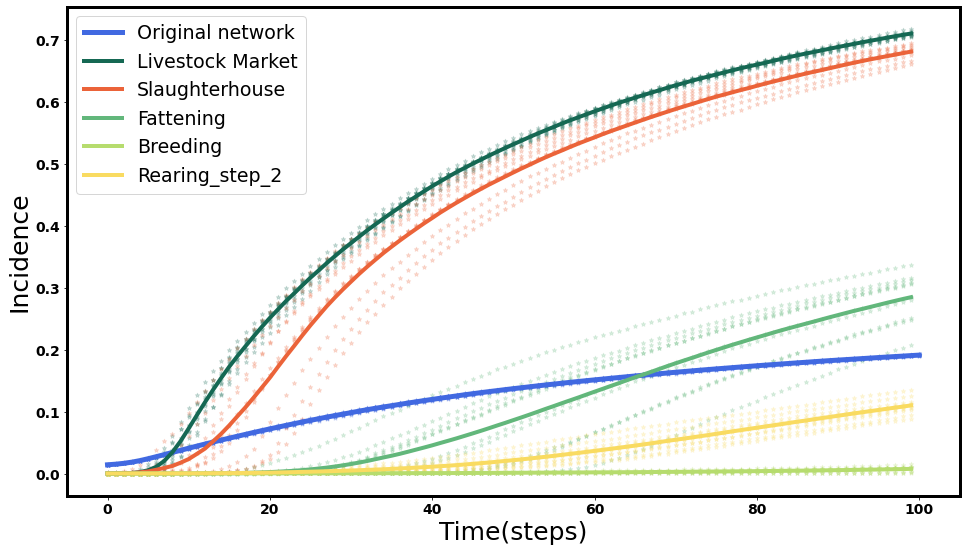

In [28]:
#color=['royalblue','goldenrod','chocolate','plum', 'lightskyblue', 'mediumseagreen']
fig, ax = plt.subplots(1,1,figsize=(16,9))

for i in range(1,11):
    ax=df_original.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='royalblue', marker='*',alpha=0.2)
plt.plot(df_original.index, mean_val_original,c='royalblue',label='Original network',linewidth=5.0)

for i in range(1,11):
    ax=df.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#156853', marker='*',alpha=0.2)
plt.plot(df.index, mean_val,c='#156853',label='Livestock Market',linewidth=4.0)


for i in range(1,11):
    ax=df4.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#EB6339', marker='*',alpha=0.2)
plt.plot(df4.index, mean_val4,label='Slaughterhouse',c='#EB6339',linewidth=4.0)


for i in range(1,11):
    ax=df1.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#62B77B', marker='*',alpha=0.2)
plt.plot(df1.index, mean_val1,c='#62B77B',label='Fattening',linewidth=4.0)


for i in range(1,11):
    ax=df2.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#B6DC6E', marker='*',alpha=0.2)
plt.plot(df2.index, mean_val2,label='Breeding',c='#B6DC6E',linewidth=4.0)


for i in range(1,11):
    ax=df3.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#F9DB61', marker='*',alpha=0.2)
plt.plot(df3.index, mean_val3,c='#F9DB61', label='Rearing_step_2',linewidth=4.0)






fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)',fontsize=25)
plt.ylabel('Incidence',fontsize=25)
plt.legend(fontsize=19)
plt.savefig('real_6_month_SI_dif_goal_0.001.pdf')

In [314]:
#functions
def make_network_edge_label_movement_Reason(df):
    data=df.iloc[:,[3,13,14,15,17,18,19,21,22,30,32]]
    #remove importation exportation        
    data=data.set_index('UF_de_Origem') 
    data=data.loc[b'MG']
    data=data.reset_index()
    data=data.set_index('UF_de_Destino') 
    data=data.loc[b'MG']
    data=data.reset_index()


    data=data.set_index('ano') 
    data=data.loc[2013]
    data=data.reset_index()

    data=data.loc[data['MONTH']<7] 
    data=data.reset_index()
    
    
    origin_code=data['Codigo_do_Local_de_Origem'] #all origins in dataset_include itterable name len(origin_code) is not equal to the length of origin node in network(len(origin_code_unique)) 
    destination_code=data['Codigo_do_Local_de_Destino'] #all destinations in dataset_include itterable name 
    origin_municipality_code=data['Codigo_Municipio_de_Origem'] 
    destination_municipality_code=data['Codigo_Municipio_de_Destino']
    number_animal=data['animais']
        
        
    #make a network        
    G=nx.DiGraph()       
    for i in range(len(origin_code)):
        if origin_code[i] not in G.nodes():
            city_code=origin_municipality_code[i]
            G.add_node(origin_code[i], c_code=city_code)
    
            if city_code in center_list_code:
                G.nodes[origin_code[i]]['region']='Center'
            if city_code in north_list_code:
                G.nodes[origin_code[i]]['region']='North'
            if city_code in east_list_code:
                G.nodes[origin_code[i]]['region']='East'
            if city_code in south_list_code:
                G.nodes[origin_code[i]]['region']='South'
            if city_code in west_list_code:
                G.nodes[origin_code[i]]['region']='West'   
    
        if destination_code[i] not in G.nodes():
            city_code=destination_municipality_code[i]
            G.add_node(destination_code[i], c_code=city_code)

            if city_code in center_list_code:
                G.nodes[destination_code[i]]['region']='Center'
            if city_code in north_list_code:
                G.nodes[destination_code[i]]['region']='North'
            if city_code in east_list_code:
                G.nodes[destination_code[i]]['region']='East'
            if city_code in south_list_code:
                G.nodes[destination_code[i]]['region']='South'
            if city_code in west_list_code:
                G.nodes[destination_code[i]]['region']='West' 
        mov_reason=data.loc[i,'Finalidade']
        if (origin_code[i],destination_code[i]) not in G.edges(): 
            G.add_edge(origin_code[i],destination_code[i])
            G.adj[origin_code[i]][destination_code[i]]['weight']=number_animal[i]
            G.adj[origin_code[i]][destination_code[i]]['reason']=mov_reason
        else:
            
            if G[origin_code[i]][destination_code[i]]['reason']==mov_reason:
                G.adj[origin_code[i]][destination_code[i]]['weight']+=number_animal[i] 
    
    return G


In [63]:
def add_uncertainty_weight_movement_reason(G, mov_reason):
    a=20
    for (u,v) in G.edges():
        if G[u][v]['reason']==mov_reason:
            G[u][v]['weight']+=int(G[u][v]['weight']*(a/100))
    return G

def add_uncertainty_weight_movement_reason(G, mov_reason):
    a=20
    for (u,v) in G.edges():
        if G[u][v]['reason']==mov_reason:
            G[u][v]['weight']+=int(G[u][v]['weight']*(a/100))
    return G

In [316]:
G_6_month_2013=make_network_edge_label_movement_Reason(df)

#add uncertainty to one type of movement


#add uncertainty to the weight of edges. exact a percent


#list graph name
graph_list=[]
for item in trns_rsn_top:
    if item=='Livestock_Market':
        market=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',b'RETORNO DE AGLOMERACAO']
        G_Livestock=add_uncertainty_weight_movement_reason(G_6_month_2013,market[0])
        G_Livestock=add_uncertainty_weight_movement_reason(G_Livestock,market[1])
        G_Livestock=add_uncertainty_weight_movement_reason(G_Livestock,market[2])
    else:
        item_name=print(item[1:-2])
        locals()['G_{0}'.format(item)]=add_uncertainty_weight_movement_reason(G_6_month_2013,item)

NameError: name 'trns_rsn_top' is not defined

In [318]:
G_6_month_2013.number_of_edges()

281590

In [87]:
market=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',b'RETORNO DE AGLOMERACAO']
G_Livestock_un=add_uncertainty_weight_movement_reason(G_6_month_2013,market[0])
G_Livestock_un=add_uncertainty_weight_movement_reason(G_Livestock_un,market[1])
G_Livestock_un=add_uncertainty_weight_movement_reason(G_Livestock_un,market[2])
G_Fattening_un=add_uncertainty_weight_movement_reason(G_6_month_2013,b'ENGORDA')
G_Breeding_un=add_uncertainty_weight_movement_reason(G_6_month_2013,b'REPRODUCAO')
G_Rearing_step_2_un=add_uncertainty_weight_movement_reason(G_6_month_2013,b'RECRIA')
G_Slaughterhouse_un=add_uncertainty_weight_movement_reason(G_6_month_2013,b'ABATE')

In [94]:
IN_IN=random.sample(list(G_6_month_2013.nodes()),10)
#df,mean_val, min_val, max_val=multiran_result_SI(G_6_month_2013,IN_IN)
#df_unW_Livestock,  mean_val1, min_val1,  max_val1=multiran_result_SI(G_Livestock_un,IN_IN)
#df_unW_Fattening,  mean_val2, min_val2,  max_val2=multiran_result_SI(G_Fattening_un,IN_IN)
#df_unW_Breeding,  mean_val3, min_val3,  max_val3=multiran_result_SI(G_Breeding_un,IN_IN)
#df_unW_Rearing_step_2,  mean_val4, min_val4,  max_val4=multiran_result_SI(G_Rearing_step_2_un,IN_IN)
df_unW_Slaughterhouse,  mean_val5, min_val5,  max_val4=multiran_result_SI(G_Slaughterhouse_un,IN_IN)

In [88]:
#run epidemic on the networks

    #initial infectes set
#IN_IN=random.sample(list(G_6_month_2013.nodes()),10)
    #run epidemic
#I,df=My_Epi_SI(G_6_month_2013,IN_IN)
#I0,df_unW_Livestock=My_Epi_SI(G_Livestock_un,IN_IN)
I1,df_unW_Fattening=My_Epi_SI(G_Fattening_un,IN_IN)
#I2,df_unW_Breeding=My_Epi_SI(G_Breeding_un,IN_IN)
#I3,df_unW_Rearing_step_2=My_Epi_SI(G_Rearing_step_2_un,IN_IN)
#I4,df_unW_Slaughterhouse=My_Epi_SI(G_Slaughterhouse_un,IN_IN)


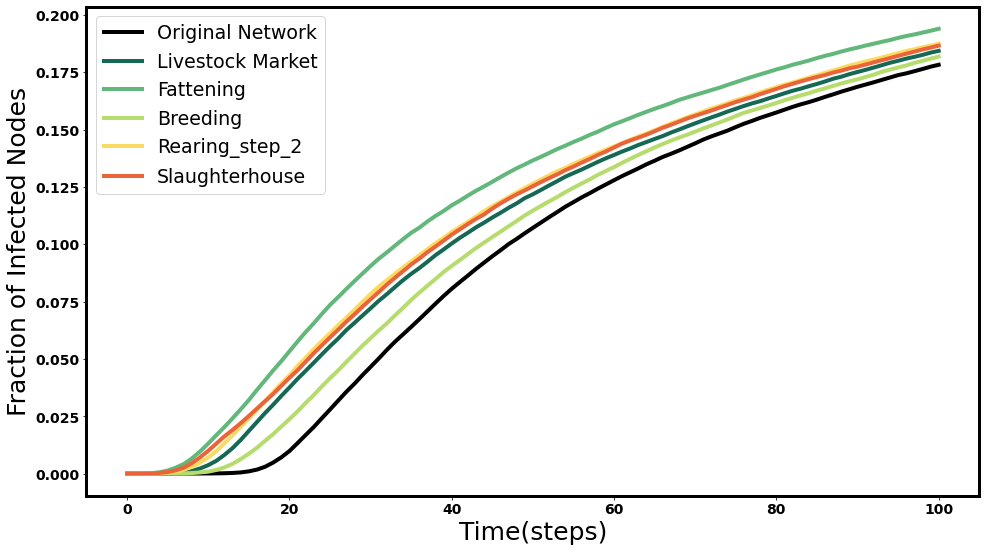

In [89]:
#scatter plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot([i[0] for i in df],[i[1] for i in df],c='black',label='Original Network',linewidth=4.0)

plt.plot([i[0] for i in df_unW_Livestock],[i[1] for i in df_unW_Livestock],c='#156853',label='Livestock Market',linewidth=4.0)

plt.plot([i[0] for i in df_unW_Fattening], [i[1] for i in df_unW_Fattening],c='#62B77B',label='Fattening',linewidth=4.0)

plt.plot([i[0] for i in df_unW_Breeding], [i[1] for i in df_unW_Breeding],label='Breeding',c='#B6DC6E',linewidth=4.0)


plt.plot([i[0] for i in df_unW_Rearing_step_2] , [i[1] for i in df_unW_Rearing_step_2],c='#F9DB61', label='Rearing_step_2',linewidth=4.0)

plt.plot([i[0] for i in df_unW_Slaughterhouse],[i[1] for i in df_unW_Slaughterhouse],label='Slaughterhouse',c='#EB6339',linewidth=4.0)


#plt.plot([i[0] for i in df_un30_e], [i[1] for i in df_un30_e],c='#206774',label='30% Missing Links on East',linestyle='dotted',linewidth=3.0)




fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3)
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
#plt.savefig('real_6_month_SI_0.001_just_missing_w_e_1000ININ_10_30.pdf')

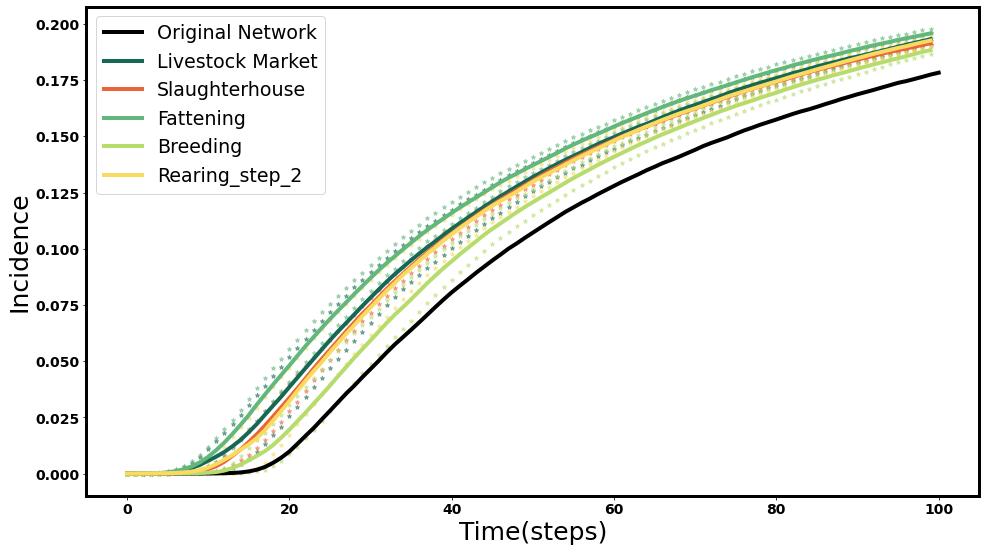

In [102]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot([i[0] for i in df],[i[1] for i in df],c='black',label='Original Network',linewidth=4.0)
#for i in range(1,11):
 #ax=df.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='royalblue', marker='*',alpha=0.2)
#plt.plot(df.index, mean_val,c='royalblue',label='Original network',linewidth=5.0)

for i in range(1,3):
    ax=df_unW_Livestock.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#156853', marker='*',alpha=0.5)
plt.plot(df_unW_Livestock.index, mean_val1,c='#156853',label='Livestock Market',linewidth=4.0)


for i in range(1,3):
    ax=df_unW_Slaughterhouse.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#EB6339', marker='*',alpha=0.5)
plt.plot(df_unW_Slaughterhouse.index, mean_val5,label='Slaughterhouse',c='#EB6339',linewidth=4.0)


for i in range(1,3):
    ax=df_unW_Fattening.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#62B77B', marker='*',alpha=0.5)
plt.plot(df_unW_Fattening.index, mean_val2,c='#62B77B',label='Fattening',linewidth=4.0)


for i in range(1,3):
    ax=df_unW_Breeding.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#B6DC6E', marker='*',alpha=0.5)
plt.plot(df_unW_Breeding.index, mean_val3,label='Breeding',c='#B6DC6E',linewidth=4.0)


for i in range(1,3):
    ax=df_unW_Rearing_step_2.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#F9DB61', marker='*',alpha=0.5)
plt.plot(df_unW_Rearing_step_2.index, mean_val4,c='#F9DB61', label='Rearing_step_2',linewidth=4.0)






fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)',fontsize=25)
plt.ylabel('Incidence',fontsize=25)
plt.legend(fontsize=19)
plt.savefig('un_weight_just20_real_6_month_SI_dif_goal_0.001.pdf')

In [24]:
str(b'ABATE')

"b'ABATE'"

In [43]:
for item in trns_rsn_top:
    print('G_{}'.format(item))

G_Livestock_Market
G_b'ABATE'
G_b'ENGORDA'
G_b'REPRODUCAO'
G_b'RECRIA'
G_b'CRIA'


In [104]:
[0xfor x in (1,2,3)]

[15]

In [5]:
def make_network_edge_label_movement_Reason_MultiGraph(df):
    data=df.iloc[:,[3,13,14,15,17,18,19,21,22,30,32]]
    #remove importation exportation        
    data=data.set_index('UF_de_Origem') 
    data=data.loc[b'MG']
    data=data.reset_index()
    data=data.set_index('UF_de_Destino') 
    data=data.loc[b'MG']
    data=data.reset_index()


    data=data.set_index('ano') 
    data=data.loc[2013]
    data=data.reset_index()

    data=data.loc[data['MONTH']<7] 
    data=data.reset_index()
    
    edges_list_label=pd.DataFrame(data.groupby(\
     ['Codigo_Municipio_de_Origem','Codigo_Municipio_de_Destino','Codigo_do_Local_de_Origem'\
      ,'Codigo_do_Local_de_Destino','Finalidade']).agg(weight=('animais','sum')).reset_index())
    
    
    G=nx.MultiDiGraph() 
    
    for i in range(len(edges_list_label)):
        G.add_edge(edges_list_label['Codigo_do_Local_de_Origem'][i],\
             edges_list_label['Codigo_do_Local_de_Destino'][i], \
        weight=edges_list_label['weight'][i], mov_reason=edges_list_label['Finalidade'][i])
        
        #If it will needed I will add region attr for nodes with this code: G.nodes[1]["room"] = 714
    
    return G
        

In [ ]:
df=pd.read_feather('table_all.feather')
#G_multiDiGraph=make_network_edge_label_movement_Reason_MultiGraph(df)

In [207]:
#G_multiDiGraph=make_network_edge_label_movement_Reason_MultiGraph(df)
trns_rsn_top_all_P=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',\
                    b'RETORNO DE AGLOMERACAO',b'ABATE',b'ENGORDA',b'REPRODUCAO',b'RECRIA',b'CRIA']


#we shoud remove the other movment reason and just keep the one we need
data=df.iloc[:,[3,13,14,15,17,18,19,21,22,30,32]]
    #remove importation exportation        
data=data.set_index('UF_de_Origem') 
data=data.loc[b'MG']
data=data.reset_index()
data=data.set_index('UF_de_Destino') 
data=data.loc[b'MG']
data=data.reset_index()
    

data=data.set_index('ano') 
data=data.loc[2013]
data=data.reset_index()
    
data=data.loc[data['MONTH']<7] 
data=data.reset_index()
edges_list_label=pd.DataFrame(data.groupby(\
     ['Codigo_Municipio_de_Origem','Codigo_Municipio_de_Destino','Codigo_do_Local_de_Origem'\
      ,'Codigo_do_Local_de_Destino','Finalidade']).agg(weight=('animais','sum')).reset_index())
    
        

list_w_r=edges_list_label.loc[edges_list_label['Finalidade'].isin(trns_rsn_top_all_P)] 


#weight distribution of different mov reason
def make_weight_list_mov_reason(list_w_r, reason_transmission):
    market=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',b'RETORNO DE AGLOMERACAO']
    if reason_transmission=='Livestock_Market': #because there is 3 purpose related to livestock market
        data_part=list_w_r.loc[list_w_r['Finalidade'].isin(market)]
    else:
        data_part=list_w_r.loc[list_w_r['Finalidade']==reason_transmission]
    
    weight_list_move_reason=list(data_part['weight'])
    return weight_list_move_reason


w_livestock_market=make_weight_list_mov_reason(list_w_r, 'Livestock_Market')
w_fattening=make_weight_list_mov_reason(list_w_r, b'ENGORDA')
w_breeding=make_weight_list_mov_reason(list_w_r, b'REPRODUCAO')
w_slaughterhouse=make_weight_list_mov_reason(list_w_r, b'ABATE')
w_rearing_step_2=make_weight_list_mov_reason(list_w_r, b'RECRIA')

def dist_dataframe(list_t):
    T_1SU=np.unique(list_t)
    dist=[]# I use 'NM_MUNICIP' for column name to be similar to the column in MG geo data fram(dc)
    for x in T_1SU:
        C=list_t.count(x)
        dist.append((x, C))
    return dist

#from finding_risk_probability_of_infection import dist_dataframe
#weight distribution
d_livestock_market=dist_dataframe(w_livestock_market)
d_fattening=dist_dataframe(w_fattening)
d_breeding=dist_dataframe(w_breeding)
d_slaughterhouse=dist_dataframe(w_slaughterhouse)
d_rearing_step_2=dist_dataframe(w_rearing_step_2)


d_livestock_market_p=[(element[0],element[1]/sum(e[1] for e in d_livestock_market)) for element in d_livestock_market]
d_fattening_p=[(element[0],element[1]/sum(e[1] for e in d_fattening)) for element in d_fattening]
d_breeding_p=[(element[0],element[1]/sum(e[1] for e in d_breeding)) for element in d_breeding]
d_slaughterhouse_p=[(element[0],element[1]/sum(e[1] for e in d_slaughterhouse)) for element in d_slaughterhouse]
d_rearing_step_2_p=[(element[0],element[1]/sum(e[1] for e in d_rearing_step_2)) for element in d_rearing_step_2]



In [206]:
khar=[(element[0],element[1]/sum(element[1]))for element in d_livestock_market]

TypeError: 'int' object is not iterable

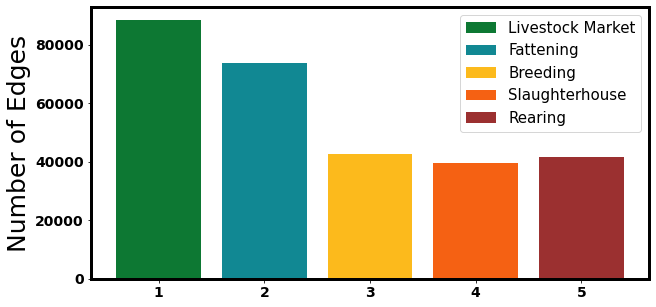

In [141]:
x=np.log([i[0] for i in d_livestock_market],dtype='float64')
y=np.log([i[1] for i in d_livestock_market],dtype='float64')
x1=np.log([i[0] for i in d_fattening],dtype='float64')
y1=np.log([i[1] for i in d_fattening],dtype='float64')
x2=np.log([i[0] for i in d_breeding],dtype='float64')
y2=np.log([i[1] for i in d_breeding],dtype='float64')
x3=np.log([i[0] for i in d_slaughterhouse],dtype='float64')
y3=np.log([i[1] for i in d_slaughterhouse],dtype='float64')
x4=np.log([i[0] for i in d_rearing_step_2],dtype='float64')
y4=np.log([i[1] for i in d_rearing_step_2],dtype='float64')



#plot
fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.bar(1,len(w_livestock_market),color='#0D7833',label='Livestock Market')
ax.bar(2,len(w_fattening),color='#118893',label='Fattening')
ax.bar(3,len(w_breeding),color='#FCBA1C',label='Breeding')
ax.bar(4,len(w_slaughterhouse),color='#F56113',label='Slaughterhouse')
ax.bar(5,len(w_rearing_step_2),color='#9B3030',label='Rearing')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.ylabel('Number of Edges',fontsize=25)
plt.legend(fontsize=15)
plt.savefig('number_edges_6_month_dif_move_reason.pdf')

In [2]:
#plot
fig, ax = plt.subplots(1,1,figsize=(16,9))
plt.scatter([i[0] for i in d_livestock_market_p], [i[1] for i in d_livestock_market_p], c='white', edgecolors='#0D7833',label='Livestock Market')
plt.scatter([i[0] for i in d_fattening_p], [i[1] for i in d_fattening_p], c='white',edgecolors='#118893',label='Fattening')
plt.scatter(x2, y2, c='white',edgecolors='#FCBA1C',label='Breeding')
plt.scatter(x3, y3, c='white', edgecolors='#F56113',label='Slaughterhouse')
plt.scatter(x4, y4, c='white', edgecolors='#9B3030',label='Rearing')
ax.set_yscale('log')
ax.set_xscale('log')
fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Weight',fontsize=25)
plt.ylabel('Number',fontsize=25)
plt.title('Distribution of Weights',fontsize=25)
plt.legend(fontsize=19)
#plt.savefig('dist_weight_dif_move_reason.pdf')

NameError: name 'plt' is not defined

In [245]:
#fit the line
from scipy.optimize import curve_fit
from math import log
from math import exp

def fun_powerlaw(x, a ,k):
    return a*(x**(-k))

def fun_truncatedpowerlaw(x,d, b ,c):
    return d*(x**(-c))*exp(b*(-x))

def fun_logb(x,e,f):
    return f+e*(np.log(x)/np.log(0.1))
def fun_poly(x,n,o,p,q):
    return (n*(x**3))+(o*(x**2))+p*x+q

def funlog(x,j,l,m):
    j * np.log(l * x) + m    #this one give he same plot as fun_logb


popt_logb, pcov_logb = curve_fit(fun_logb, [i[0] for i in d_livestock_market_p], [i[1] for i in d_livestock_market_p])
popt_powerlaw,pcov_powerlaw=curve_fit(fun_powerlaw, [i[0] for i in d_livestock_market_p], [i[1] for i in d_livestock_market_p])
#popt_truncpowerlaw,pcov_truncpowerlaw=curve_fit(fun_truncatedpowerlaw, [i[0] for i in d_livestock_market], [i[1] for i in d_livestock_market])
popt_poly, pcov_poly=curve_fit(fun_poly, [i[0] for i in d_livestock_market_p], [i[1] for i in d_livestock_market_p])


#new method for powerlaw
import powerlaw
fit_pow_new=powerlaw.Fit(w_livestock_market,xmin=1,discrete=True)
fit_pow_new.power_law.alpha
fit_pow_new.power_law.sigma
#fit_pow_new.power_law.plot_pdf( color= 'b',linestyle='--')

0.001020668790998275

In [244]:
popt_powerlaw

array([0.08126276, 0.69355634])

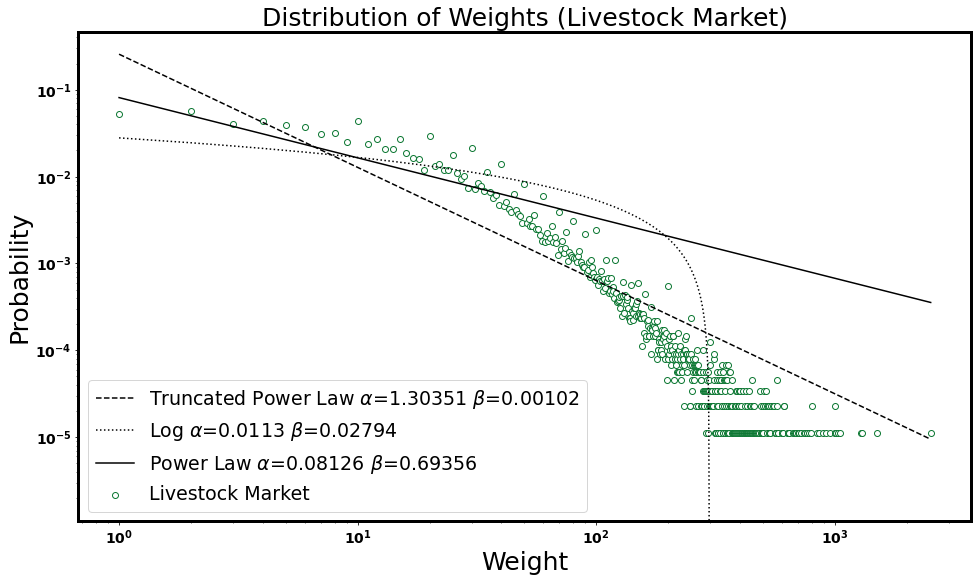

In [247]:
#plot
fig, ax = plt.subplots(1,1,figsize=(16,9))
#ax=fit_pow_new.plot_pdf(color='b')
plt.scatter([i[0] for i in d_livestock_market_p],[i[1] for i in d_livestock_market_p], c='white', edgecolors='#0D7833',label='Livestock Market')
fit_pow_new.power_law.plot_pdf(w_livestock_market,\
label="Truncated Power Law"+' '+r'$\alpha$'+'='+str(round(fit_pow_new.power_law.alpha,5))+' '+r'$\beta$'+'='+str(round(fit_pow_new.power_law.sigma,5)),color= 'black',linestyle='--',)
plt.plot([i[0] for i in d_livestock_market_p], fun_logb([i[0] for i in d_livestock_market_p], *popt_logb),\
         label='Log'+' '+r'$\alpha$'+'='+str(round(popt_logb[0],5))+' '+r'$\beta$'+'='+str(round(popt_logb[1],5)),\
         c='black',linestyle='dotted')
plt.plot([i[0] for i in d_livestock_market_p], fun_powerlaw([i[0] for i in d_livestock_market_p], *popt_powerlaw),\
         label="Power Law"+' '+r'$\alpha$'+'='+str(round(popt_powerlaw[0],5))+' '+r'$\beta$'+'='+str(round(popt_powerlaw[1],5)),c='black')


fontsize = 14
ax.set_yscale('log')
ax.set_xscale('log')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Weight',fontsize=25)
plt.ylabel('Probability',fontsize=25)
plt.title('Distribution of Weights (Livestock Market)',fontsize=25)
plt.legend(fontsize=19)
plt.savefig('dist_probab_weight_Livestock Market.pdf')

In [251]:
popt_logb, pcov_logb = curve_fit(fun_logb, [i[0] for i in d_fattening_p], [i[1] for i in d_fattening_p])
popt_powerlaw,pcov_powerlaw=curve_fit(fun_powerlaw, [i[0] for i in d_fattening_p], [i[1] for i in d_fattening_p])
popt_poly, pcov_poly=curve_fit(fun_poly, [i[0] for i in d_fattening_p], [i[1] for i in d_fattening_p])


#new method for powerlaw
import powerlaw
fit_pow_new=powerlaw.Fit(w_fattening,xmin=1,discrete=True)
fit_pow_new.power_law.alpha
fit_pow_new.power_law.sigma

0.001068191143729272

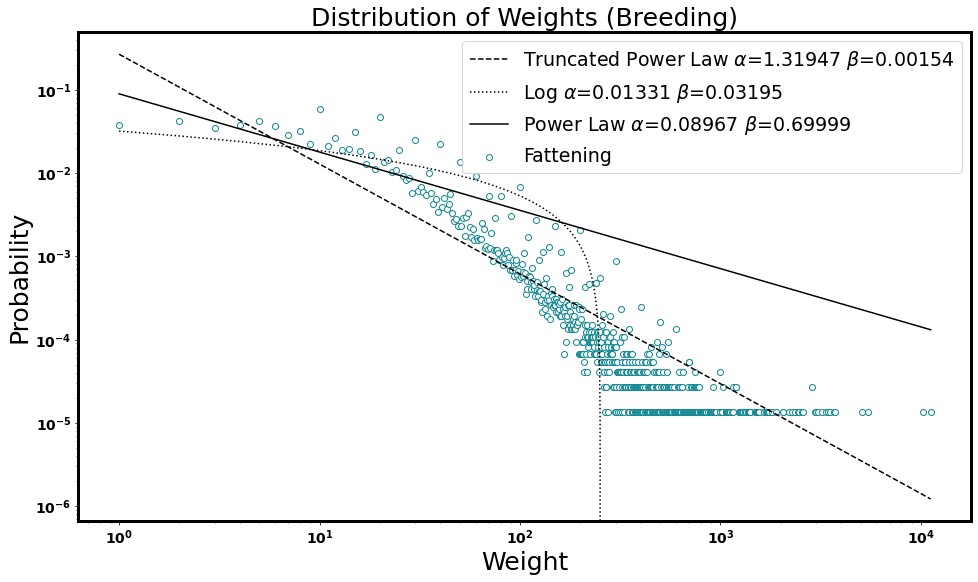

In [255]:
#plot
fig, ax = plt.subplots(1,1,figsize=(16,9))
#ax=fit_pow_new.plot_pdf(color='b')
plt.scatter([i[0] for i in d_fattening_p],[i[1] for i in d_fattening_p], c='white', edgecolors='#118893',label='Fattening')
fit_pow_new.power_law.plot_pdf(w_fattening,\
label="Truncated Power Law"+' '+r'$\alpha$'+'='+str(round(fit_pow_new.power_law.alpha,5))+' '+r'$\beta$'+'='+str(round(fit_pow_new.power_law.sigma,5)),color= 'black',linestyle='--',)
plt.plot([i[0] for i in d_fattening_p], fun_logb([i[0] for i in d_fattening_p], *popt_logb),\
         label='Log'+' '+r'$\alpha$'+'='+str(round(popt_logb[0],5))+' '+r'$\beta$'+'='+str(round(popt_logb[1],5)),\
         c='black',linestyle='dotted')
plt.plot([i[0] for i in d_fattening_p], fun_powerlaw([i[0] for i in d_fattening_p], *popt_powerlaw),\
          label="Power Law"+' '+r'$\alpha$'+'='+str(round(popt_powerlaw[0],5))+' '+r'$\beta$'+'='+str(round(popt_powerlaw[1],5)),c='black')


fontsize = 14
ax.set_yscale('log')
ax.set_xscale('log')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Weight',fontsize=25)
plt.ylabel('Probability',fontsize=25)
plt.title('Distribution of Weights (Breeding)',fontsize=25)
plt.legend(fontsize=19)
plt.savefig('dist_probab_weight_breeding.pdf')

In [260]:
popt_logb, pcov_logb = curve_fit(fun_logb, [i[0] for i in d_breeding_p], [i[1] for i in d_breeding_p])
popt_powerlaw,pcov_powerlaw=curve_fit(fun_powerlaw, [i[0] for i in d_breeding_p], [i[1] for i in d_breeding_p])
popt_poly, pcov_poly=curve_fit(fun_poly, [i[0] for i in d_breeding_p], [i[1] for i in d_breeding_p])


#new method for powerlaw
import powerlaw
fit_pow_new=powerlaw.Fit(w_breeding,xmin=1,discrete=True)
fit_pow_new.power_law.alpha
fit_pow_new.power_law.sigma

/home/sfarokhnejad/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide



0.0015442740985363963

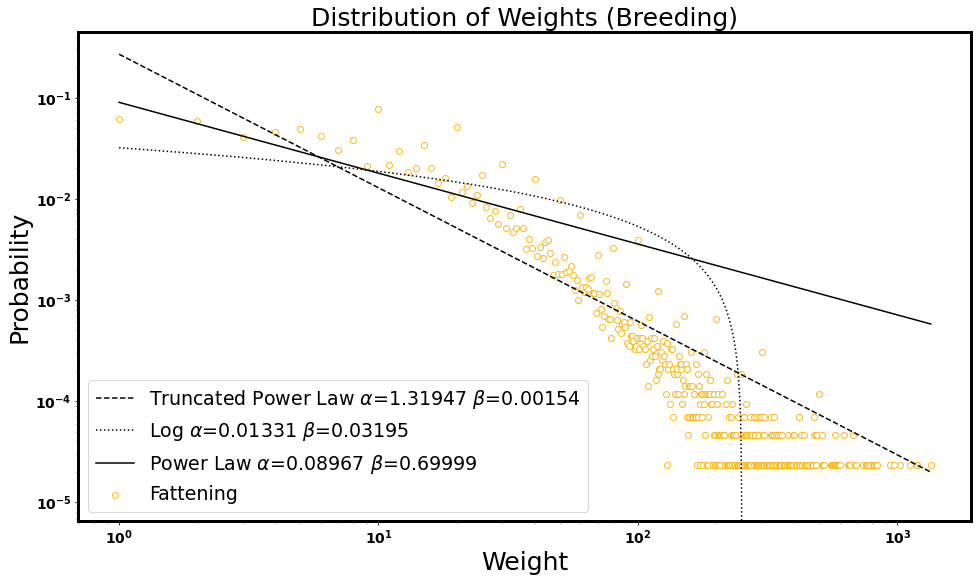

In [261]:
#plot
fig, ax = plt.subplots(1,1,figsize=(16,9))
#ax=fit_pow_new.plot_pdf(color='b')
plt.scatter([i[0] for i in d_breeding_p],[i[1] for i in d_breeding_p], c='white', edgecolors='#FCBA1C',label='Fattening')
fit_pow_new.power_law.plot_pdf(w_breeding,\
label="Truncated Power Law"+' '+r'$\alpha$'+'='+str(round(fit_pow_new.power_law.alpha,5))+' '+r'$\beta$'+'='+str(round(fit_pow_new.power_law.sigma,5)),color= 'black',linestyle='--',)
plt.plot([i[0] for i in d_breeding_p], fun_logb([i[0] for i in d_breeding_p], *popt_logb),\
         label='Log'+' '+r'$\alpha$'+'='+str(round(popt_logb[0],5))+' '+r'$\beta$'+'='+str(round(popt_logb[1],5)),\
         c='black',linestyle='dotted')
plt.plot([i[0] for i in d_breeding_p], fun_powerlaw([i[0] for i in d_breeding_p], *popt_powerlaw),\
          label="Power Law"+' '+r'$\alpha$'+'='+str(round(popt_powerlaw[0],5))+' '+r'$\beta$'+'='+str(round(popt_powerlaw[1],5)),c='black')


fontsize = 14
ax.set_yscale('log')
ax.set_xscale('log')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Weight',fontsize=25)
plt.ylabel('Probability',fontsize=25)
plt.title('Distribution of Weights (Breeding)',fontsize=25)
plt.legend(fontsize=19)
plt.savefig('dist_probab_weight_breeding.pdf')

In [256]:
popt_logb, pcov_logb = curve_fit(fun_logb, [i[0] for i in d_slaughterhouse_p], [i[1] for i in d_slaughterhouse_p])
popt_powerlaw,pcov_powerlaw=curve_fit(fun_powerlaw, [i[0] for i in d_slaughterhouse_p], [i[1] for i in d_slaughterhouse_p])
popt_poly, pcov_poly=curve_fit(fun_poly, [i[0] for i in d_slaughterhouse_p], [i[1] for i in d_slaughterhouse_p])


#new method for powerlaw
import powerlaw
fit_pow_new=powerlaw.Fit(w_slaughterhouse,xmin=1,discrete=True)
fit_pow_new.power_law.alpha
fit_pow_new.power_law.sigma

/home/sfarokhnejad/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide



0.0014382205165055168

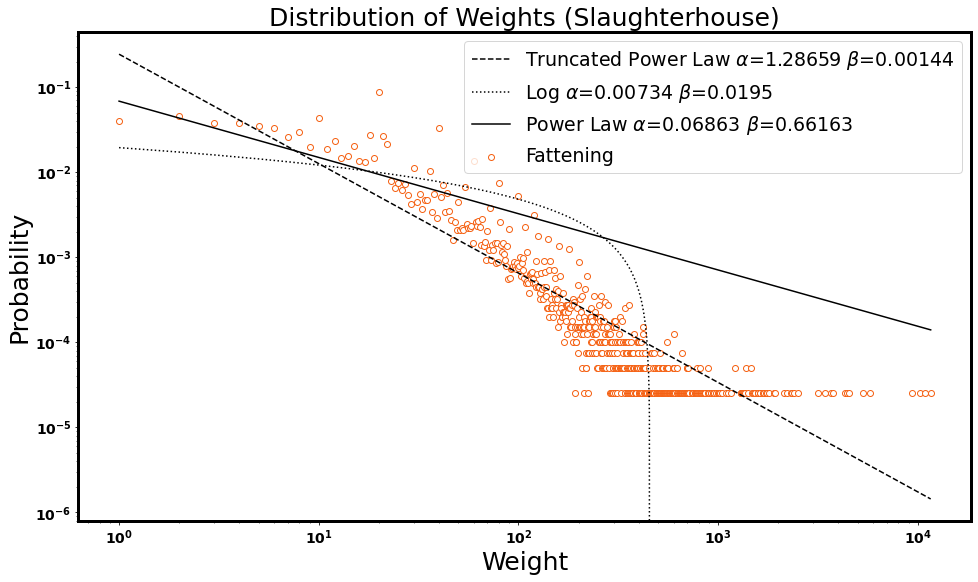

In [257]:
#plot
fig, ax = plt.subplots(1,1,figsize=(16,9))
#ax=fit_pow_new.plot_pdf(color='b')
plt.scatter([i[0] for i in d_slaughterhouse_p],[i[1] for i in d_slaughterhouse_p], c='white', edgecolors='#F56113',label='Fattening')
fit_pow_new.power_law.plot_pdf(w_slaughterhouse,\
label="Truncated Power Law"+' '+r'$\alpha$'+'='+str(round(fit_pow_new.power_law.alpha,5))+' '+r'$\beta$'+'='+str(round(fit_pow_new.power_law.sigma,5)),color= 'black',linestyle='--',)
plt.plot([i[0] for i in d_slaughterhouse_p], fun_logb([i[0] for i in d_slaughterhouse_p], *popt_logb),\
         label='Log'+' '+r'$\alpha$'+'='+str(round(popt_logb[0],5))+' '+r'$\beta$'+'='+str(round(popt_logb[1],5)),\
         c='black',linestyle='dotted')
plt.plot([i[0] for i in d_slaughterhouse_p], fun_powerlaw([i[0] for i in d_slaughterhouse_p], *popt_powerlaw),\
          label="Power Law"+' '+r'$\alpha$'+'='+str(round(popt_powerlaw[0],5))+' '+r'$\beta$'+'='+str(round(popt_powerlaw[1],5)),c='black')


fontsize = 14
ax.set_yscale('log')
ax.set_xscale('log')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Weight',fontsize=25)
plt.ylabel('Probability',fontsize=25)
plt.title('Distribution of Weights (Slaughterhouse)',fontsize=25)
plt.legend(fontsize=19)
plt.savefig('dist_probab_weight_slaughterhouse.pdf')

In [258]:
popt_logb, pcov_logb = curve_fit(fun_logb, [i[0] for i in d_rearing_step_2_p], [i[1] for i in d_rearing_step_2_p])
popt_powerlaw,pcov_powerlaw=curve_fit(fun_powerlaw, [i[0] for i in d_rearing_step_2_p], [i[1] for i in d_rearing_step_2_p])
popt_poly, pcov_poly=curve_fit(fun_poly, [i[0] for i in d_rearing_step_2_p], [i[1] for i in d_rearing_step_2_p])


#new method for powerlaw
import powerlaw
fit_pow_new=powerlaw.Fit(w_rearing_step_2,xmin=1,discrete=True)
fit_pow_new.power_law.alpha
fit_pow_new.power_law.sigma

/home/sfarokhnejad/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide



0.001512493251605366

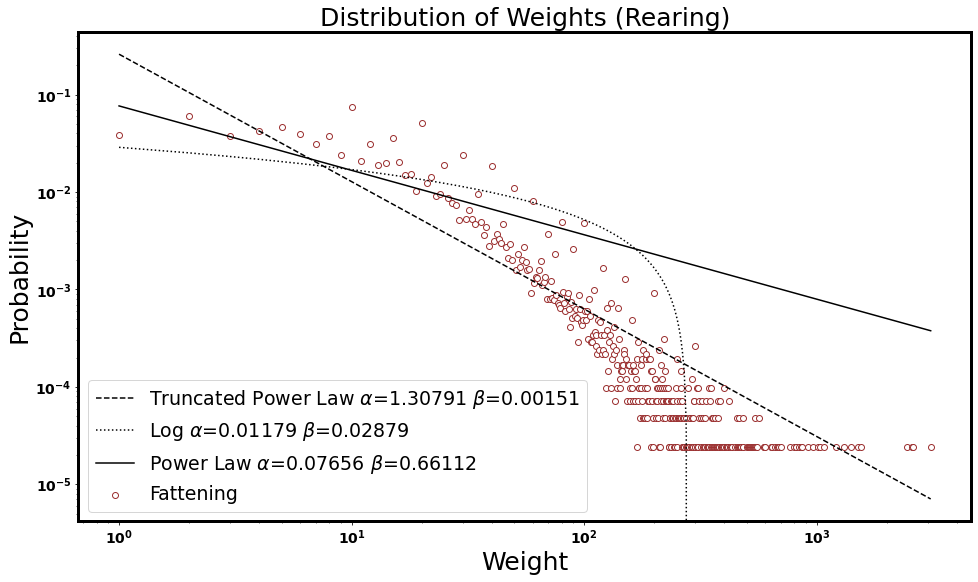

In [259]:
#plot
fig, ax = plt.subplots(1,1,figsize=(16,9))
#ax=fit_pow_new.plot_pdf(color='b')
plt.scatter([i[0] for i in d_rearing_step_2_p],[i[1] for i in d_rearing_step_2_p], c='white', edgecolors='#9B3030',label='Fattening')
fit_pow_new.power_law.plot_pdf(w_rearing_step_2,\
label="Truncated Power Law"+' '+r'$\alpha$'+'='+str(round(fit_pow_new.power_law.alpha,5))+' '+r'$\beta$'+'='+str(round(fit_pow_new.power_law.sigma,5)),color= 'black',linestyle='--',)
plt.plot([i[0] for i in d_rearing_step_2_p], fun_logb([i[0] for i in d_rearing_step_2_p], *popt_logb),\
         label='Log'+' '+r'$\alpha$'+'='+str(round(popt_logb[0],5))+' '+r'$\beta$'+'='+str(round(popt_logb[1],5)),\
         c='black',linestyle='dotted')
plt.plot([i[0] for i in d_rearing_step_2_p], fun_powerlaw([i[0] for i in d_rearing_step_2_p], *popt_powerlaw),\
          label="Power Law"+' '+r'$\alpha$'+'='+str(round(popt_powerlaw[0],5))+' '+r'$\beta$'+'='+str(round(popt_powerlaw[1],5)),c='black')


fontsize = 14
ax.set_yscale('log')
ax.set_xscale('log')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Weight',fontsize=25)
plt.ylabel('Probability',fontsize=25)
plt.title('Distribution of Weights (Rearing)',fontsize=25)
plt.legend(fontsize=19)
plt.savefig('dist_probab_weight_rearing_step_2.pdf')

In [215]:

#*********work with multigraph:
# get all edges between two given nodes n_1 and n_2:
#G.get_edge_data(n_1,n_2) this give us a dict include edges, keys and the attributes

#add uncertanity to the weights of a given movement reason in multigraph

def add_uncertainty_weight_movement_reason_multiDigraph(G, mov_reason):
    a=20
    for (u,v) in G.edges(): #be careful it should not be .edges(data=True)
        dict_multiedges=G.get_edge_data(u, v)
        for i in range(len(dict_multiedges)):
            if G[u][v][i]['mov_reason']==mov_reason:
                G[u][v][i]['weight']+=int(G[u][v][i]['weight']*(a/100))            
    return G


#make network with change weights

market=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',b'RETORNO DE AGLOMERACAO']
G_M_livestock_20=add_uncertainty_weight_movement_reason_multiDigraph(G_multiDiGraph,market[0])
G_M_livestock_20=add_uncertainty_weight_movement_reason_multiDigraph(G_M_livestock_20,market[1])
G_M_livestock_20=add_uncertainty_weight_movement_reason_multiDigraph(G_M_livestock_20,market[2])

G_M_fattening_20=add_uncertainty_weight_movement_reason_multiDigraph(G_multiDiGraph, b'ENGORDA')
G_M_breeding_20=add_uncertainty_weight_movement_reason_multiDigraph(G_multiDiGraph, b'REPRODUCAO')
G_M_slaughterhouse_20=add_uncertainty_weight_movement_reason_multiDigraph(G_multiDiGraph, b'ABATE')
G_M_rearing_20=add_uncertainty_weight_movement_reason_multiDigraph(G_multiDiGraph, b'RECRIA')

In [315]:
def My_Epi_SI_MultiDigraph(Graph, initial_infecteds):
    G=copy.deepcopy(Graph)
    beta=0.001#0.001#0.02085574#0.00042337#0.00084674     #missinglink #0.00006864988#0.0006864988 #0.001144#0.00134228   #0.001121#0.002242           # weight_un=#0.00095969#0.00191938 #0.00136986# previous: 0.0027397
    infected = initial_infecteds.copy()
    N=G.order()
    t=101 #number of steps of iteration
    susceptible = list(G.nodes())
    
    for infected_node in infected:
        if infected_node in susceptible: 
            susceptible.remove(infected_node)
    
    num_j=[]
    num_j.append([0,float(len(infected)/N)])
    #Inicializar el tiempo
    j=1
    while j<t:
        infected_1 = list()
        #Realizar la infección
        for node in infected: 
            if len(set(G.neighbors(node)))>0:
                '''strategy here is that every time the first chance is get to the highest weight of edges in node neighbors. 
                if rhe neighbor with highest weight does not infect then the second chance is based on random sample choice'''
                neigh = list(G.neighbors(node))
                if len(neigh)==1:
                    nei=neigh[0]
                    #neigh=set(G.neighbors(node))
                    if  nei not in list(infected):
                        if  nei not in list(infected_1):
                            dict_multiedges=G.get_edge_data(node, nei)
                            for i in range(len(dict_multiedges)):
                                if  nei not in list(infected_1):
                                    if random.random()<1-((1-beta)**G[node][nei][i]['weight']):
                                        infected_1.append(nei)
                # if len(edges) > 0: #some nodes have zero edges going into it #this one could be useful in directed network
                else:
                    for nbr in set(G.neighbors(node)):
                        if nbr not in list(infected):
                            if  nbr not in list(infected_1):
                                dict_multiedges=G.get_edge_data(node, nbr)
                                for i in range(len(dict_multiedges)):
                                    if  nbr not in list(infected_1):
                                        if random.random()<1-((1-beta)**G[node][nbr][i]['weight']):
                                            infected_1.append(nbr)
                           
        #Remover a los infectados de los susceptibles:
        infected += infected_1
        for infected_node in infected_1:
            if infected_node in susceptible: 
                susceptible.remove(infected_node)
            

        #Registrar el porcentaje de nodos infectados en una lista para luego graficar
        num_j.append([j,float(len(infected)/N)])
        
        #Actualizar el tiempo
        j +=1
                            
    return num_j



def get_data_SI_MultiDigraph(Graph, IN_IN):
    I=My_Epi_SI_MultiDigraph(Graph,IN_IN)
    I1=pd.DataFrame([i[1] for i in I], columns=['vals'])
    return I1
def multiran_result_SI_MultiDigraph(Graph,IN_IN):
    dfs_un=pd.DataFrame(list(range(0,100)), columns=['time'])
    for i in range(1,21):
        #time.sleep(5)
        df_un=get_data_SI_MultiDigraph(Graph,IN_IN)
        dfs_un.insert(i, f"vals_{i}", df_un) 
    df_all_un= dfs_un.set_index('time')
    mean_val_un = df_all_un.iloc[:,0:].mean(axis=1)
    std_val_un= df_all_un.iloc[:,0:].std(axis=1)
    min_val_un = mean_val_un - 2*std_val_un
    max_val_un = mean_val_un + 2*std_val_un
    df_all_un.reset_index(inplace = True)
    
    return df_all_un ,  mean_val_un, min_val_un,  max_val_un


In [286]:
IN_IN=random.sample(list(G_multiDiGraph.nodes()),10)

I=My_Epi_SI_MultiDigraph(G_multiDiGraph,IN_IN)
#I0=My_Epi_SI_MultiDigraph(G_M_livestock_30,IN_IN)
#I1=My_Epi_SI_MultiDigraph(G_M_fattening_30,IN_IN)
#I2=My_Epi_SI_MultiDigraph(G_M_breeding_30,IN_IN)
I3=My_Epi_SI_MultiDigraph(G_M_rearing_30,IN_IN)
I4=My_Epi_SI_MultiDigraph(G_M_slaughterhouse_30,IN_IN)

In [ ]:
df,mean_val, min_val, max_val=multiran_result_SI_MultiDigraph(G_multiDiGraph,IN_IN)
df_unW_Livestock,  mean_val1, min_val1,  max_val1=multiran_result_SI_MultiDigraph(G_M_livestock_20,IN_IN)
df_unW_Fattening,  mean_val2, min_val2,  max_val2=multiran_result_SI_MultiDigraph(G_M_fattening_20,IN_IN)
df_unW_Breeding,  mean_val3, min_val3,  max_val3=multiran_result_SI_MultiDigraph(G_M_breeding_20,IN_IN)
df_unW_Rearing_step_2,  mean_val4, min_val4,  max_val4=multiran_result_SI_MultiDigraph(G_M_rearing_20,IN_IN)
df_unW_Slaughterhouse,  mean_val5, min_val5,  max_val4=multiran_result_SI_MultiDigraph(G_M_slaughterhouse_20,IN_IN)

In [322]:
df_unW_Slaughterhouse

,time,vals_1,vals_2,vals_3,vals_4,vals_5,vals_6,vals_7,vals_8,vals_9,...,vals_11,vals_12,vals_13,vals_14,vals_15,vals_16,vals_17,vals_18,vals_19,vals_20
0,0,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,...,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072
1,1,0.000072,0.000093,0.000079,0.000072,0.000079,0.000072,0.000072,0.000079,0.000079,...,0.000079,0.000093,0.000079,0.000072,0.000079,0.000072,0.000079,0.000072,0.000072,0.000086
2,2,0.000072,0.000100,0.000079,0.000072,0.000079,0.000072,0.000079,0.000093,0.000086,...,0.000079,0.000100,0.000079,0.000072,0.000079,0.000072,0.000100,0.000072,0.000072,0.000093
3,3,0.000086,0.000107,0.000093,0.000079,0.000086,0.000072,0.000100,0.000107,0.000086,...,0.000079,0.000115,0.000079,0.000072,0.000079,0.000072,0.000136,0.000072,0.000079,0.000093
4,4,0.000100,0.000129,0.000093,0.000086,0.000115,0.000072,0.000107,0.000129,0.000100,...,0.000086,0.000122,0.000093,0.000079,0.000086,0.000072,0.000172,0.000086,0.000086,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.180497,0.190985,0.185100,0.190899,0.188372,0.186074,0.168283,0.191136,0.187585,...,0.183260,0.190484,0.180268,0.189310,0.179717,0.188415,0.186632,0.184463,0.189210,0.186146
96,96,0.181370,0.191751,0.186253,0.191744,0.189374,0.186947,0.169422,0.192123,0.188422,...,0.184041,0.191314,0.181292,0.190155,0.180740,0.189324,0.187348,0.185594,0.190090,0.186969
97,97,0.182222,0.192446,0.187148,0.192524,0.190155,0.187935,0.170553,0.192954,0.189131,...,0.184936,0.192088,0.182222,0.190871,0.181578,0.190133,0.188157,0.186539,0.190942,0.187921
98,98,0.183217,0.193362,0.188086,0.193326,0.191057,0.188752,0.171834,0.193799,0.189961,...,0.185838,0.192897,0.183175,0.191737,0.182537,0.190914,0.188973,0.187527,0.191758,0.188694


In [321]:
df_unW_Livestock.to_pickle('real_network/df_unW_Livestock_w_20.pkl')
df_unW_Fattening.to_pickle('real_network/df_unW_Fattening_w_20.pkl')
df_unW_Breeding.to_pickle('real_network/df_unW_Breeding_w_20.pkl')
df_unW_Rearing_step_2.to_pickle('real_network/df_unW_Rearing_step_2_w_20.pkl')
df_unW_Slaughterhouse.to_pickle('real_network/df_unW_Slaughterhous_w_20.pkl')
df.to_pickle('real_network/df_original_0.001_21run.pkl')


NameError: name 'df_unW_Slaughterhous' is not defined

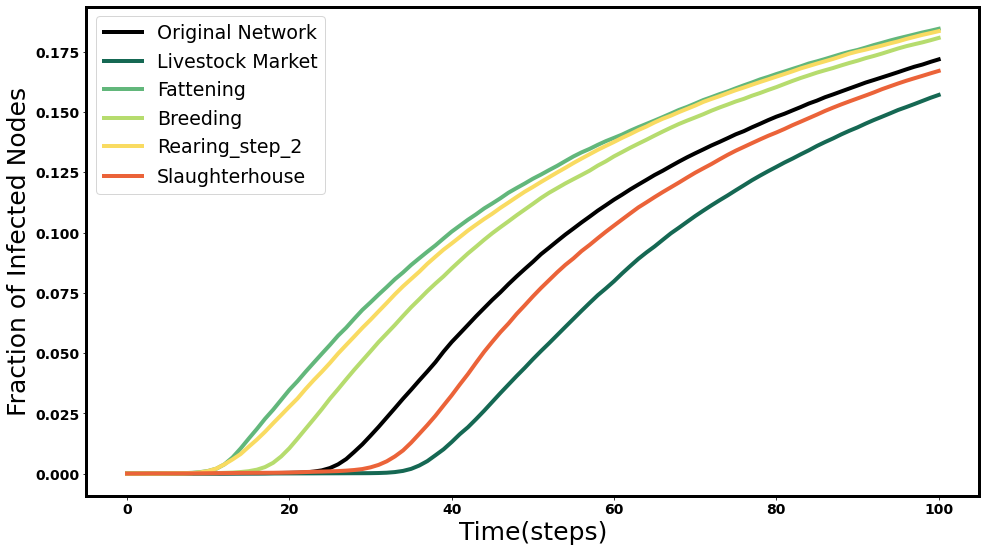

In [295]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot([i[0] for i in I],[i[1] for i in I],c='black',label='Original Network',linewidth=4.0)

plt.plot([i[0] for i in I0],[i[1] for i in I0],c='#156853',label='Livestock Market',linewidth=4.0)

plt.plot([i[0] for i in I1], [i[1] for i in I1],c='#62B77B',label='Fattening',linewidth=4.0)

plt.plot([i[0] for i in I2], [i[1] for i in I2],label='Breeding',c='#B6DC6E',linewidth=4.0)


plt.plot([i[0] for i in I3] , [i[1] for i in I3],c='#F9DB61', label='Rearing_step_2',linewidth=4.0)

plt.plot([i[0] for i in I4],[i[1] for i in I4],label='Slaughterhouse',c='#EB6339',linewidth=4.0)


#plt.plot([i[0] for i in df_un30_e], [i[1] for i in df_un30_e],c='#206774',label='30% Missing Links on East',linestyle='dotted',linewidth=3.0)




fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3)
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
#plt.savefig('real_6_month_SI_0.001_just_missing_w_e_1000ININ_10_30.pdf')

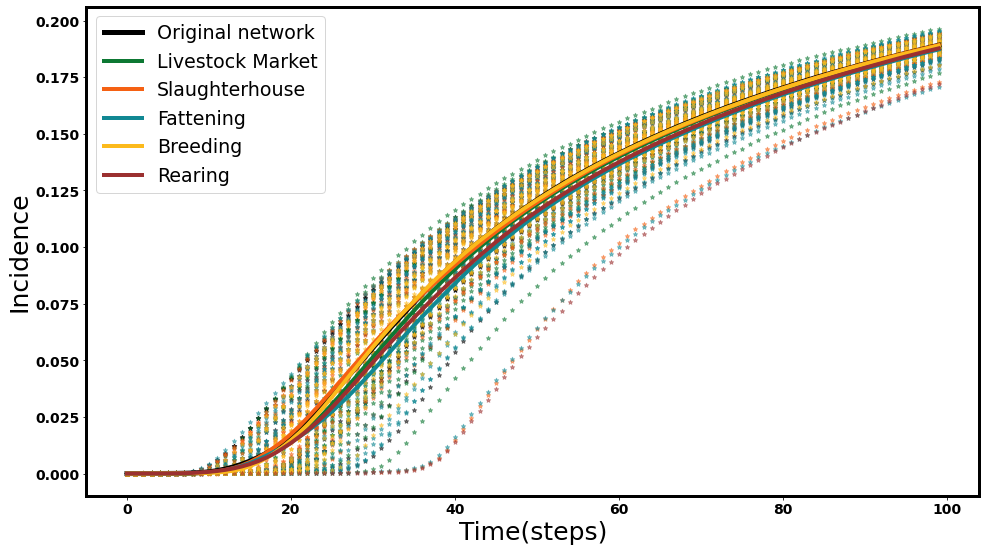

In [320]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

#plt.plot([i[0] for i in df],[i[1] for i in df],c='black',label='Original Network',linewidth=4.0)
for i in range(1,21):
    ax=df.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='black', marker='*',alpha=0.5)
plt.plot(df.index, mean_val,c='black',label='Original network',linewidth=5.0)

for i in range(1,21):
    ax=df_unW_Livestock.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#0D7833', marker='*',alpha=0.5)
plt.plot(df_unW_Livestock.index, mean_val1,c='#0D7833',label='Livestock Market',linewidth=4.0)


for i in range(1,21):
    ax=df_unW_Slaughterhouse.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#F56113', marker='*',alpha=0.5)
plt.plot(df_unW_Slaughterhouse.index, mean_val5,label='Slaughterhouse',c='#F56113',linewidth=4.0)


for i in range(1,21):
    ax=df_unW_Fattening.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#118893', marker='*',alpha=0.5)
plt.plot(df_unW_Fattening.index, mean_val2,c='#118893',label='Fattening',linewidth=4.0)


for i in range(1,21):
    ax=df_unW_Breeding.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#FCBA1C', marker='*',alpha=0.5)
plt.plot(df_unW_Breeding.index, mean_val3,label='Breeding',c='#FCBA1C',linewidth=4.0)


for i in range(1,2):
    ax=df_unW_Rearing_step_2.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#9B3030', marker='*',alpha=0.5)
plt.plot(df_unW_Rearing_step_2.index, mean_val4,c='#9B3030', label='Rearing',linewidth=4.0)






fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)',fontsize=25)
plt.ylabel('Incidence',fontsize=25)
plt.legend(fontsize=19)
plt.savefig('un_weight_just20_real_6_month_SI_dif_goal_0.001.pdf')

In [291]:
def My_Epi_SI_MultiDigraph_risk_one_moveReason_allow(Graph, initial_infecteds, mov_reason):
    G=copy.deepcopy(Graph)
    beta=0.001#0.001#0.02085574#0.00042337#0.00084674     #missinglink #0.00006864988#0.0006864988 #0.001144#0.00134228   #0.001121#0.002242           # weight_un=#0.00095969#0.00191938 #0.00136986# previous: 0.0027397
    infected = initial_infecteds.copy()
    N=G.order()
    market=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',b'RETORNO DE AGLOMERACAO']
    t=101 #number of steps of iteration
    susceptible = list(G.nodes())
    
    for infected_node in infected:
        if infected_node in susceptible: 
            susceptible.remove(infected_node)
    
    num_j=[]
    num_j.append([0,float(len(infected)/N)])
    #Inicializar el tiempo
    j=1
    while j<t:
        infected_1 = list()
        #Realizar la infección
        for node in infected: 
            if len(set(G.neighbors(node)))>0:
                '''strategy here is that every time the first chance is get to the highest weight of edges in node neighbors. 
                if rhe neighbor with highest weight does not infect then the second chance is based on random sample choice'''
                neigh = list(G.neighbors(node))
                if len(neigh)==1:
                    nei=neigh[0]
                    #neigh=set(G.neighbors(node))
                    if  nei not in list(infected):
                        if  nei not in list(infected_1):
                            dict_multiedges=G.get_edge_data(node, nei)
                            for i in range(len(dict_multiedges)):
                                if  nei not in list(infected_1):
                                    if mov_reason=='Livestock_Market':
                                        if G[node][nei][i]['mov_reason'] in market:
                                            if random.random()<1-((1-beta)**G[node][nei][i]['weight']):
                                                infected_1.append(nei)   
                                    else:
                                        if G[node][nei][i]['mov_reason']==mov_reason:
                                            if random.random()<1-((1-beta)**G[node][nei][i]['weight']):
                                                infected_1.append(nei)
                # if len(edges) > 0: #some nodes have zero edges going into it #this one could be useful in directed network
                else:
                    for nbr in set(G.neighbors(node)):
                        if nbr not in list(infected):
                            if  nbr not in list(infected_1):
                                dict_multiedges=G.get_edge_data(node, nbr)
                                for i in range(len(dict_multiedges)):
                                    if  nbr not in list(infected_1):
                                        if mov_reason=='Livestock_Market':
                                            if G[node][nbr][i]['mov_reason'] in market:
                                                if random.random()<1-((1-beta)**G[node][nbr][i]['weight']):
                                                    infected_1.append(nbr)   
                                        else:
                                            if G[node][nbr][i]['mov_reason']==mov_reason:
                                                if random.random()<1-((1-beta)**G[node][nbr][i]['weight']):
                                                    infected_1.append(nbr)
                           
        #Remover a los infectados de los susceptibles:
        infected += infected_1
        for infected_node in infected_1:
            if infected_node in susceptible: 
                susceptible.remove(infected_node)
            

        #Registrar el porcentaje de nodos infectados en una lista para luego graficar
        num_j.append([j,float(len(infected)/N)])
        
        #Actualizar el tiempo
        j +=1
                            
    return num_j

In [294]:

#Risk_livestock=My_Epi_SI_MultiDigraph_risk_one_moveReason_allow(G_multiDiGraph,IN_IN,'Livestock_Market')
#Risk_fattenig=My_Epi_SI_MultiDigraph_risk_one_moveReason_allow(G_multiDiGraph,IN_IN,b'ENGORDA')
Risk_breeding=My_Epi_SI_MultiDigraph_risk_one_moveReason_allow(G_multiDiGraph,IN_IN,b'REPRODUCAO')
Risk_slaughterhouse=My_Epi_SI_MultiDigraph_risk_one_moveReason_allow(G_multiDiGraph,IN_IN,b'ABATE')
Risk_rearing=My_Epi_SI_MultiDigraph_risk_one_moveReason_allow(G_multiDiGraph,IN_IN,b'RECRIA')


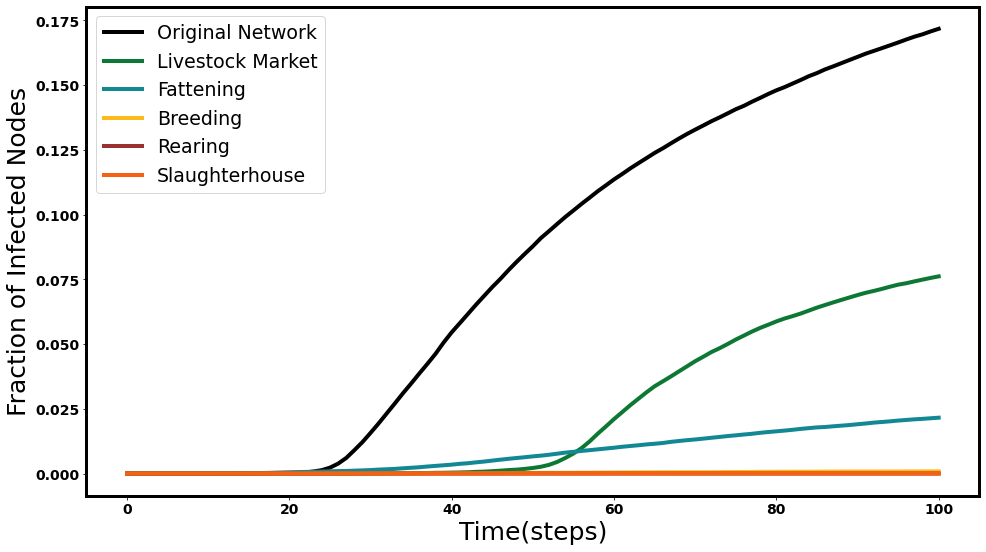

In [310]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot([i[0] for i in I],[i[1] for i in I],c='black',label='Original Network',linewidth=4.0)

plt.plot([i[0] for i in Risk_livestock],[i[1] for i in Risk_livestock],c='#0D7833',label='Livestock Market',linewidth=4.0)

plt.plot([i[0] for i in Risk_fattenig], [i[1] for i in Risk_fattenig],c='#118893',label='Fattening',linewidth=4.0)

plt.plot([i[0] for i in Risk_breeding], [i[1] for i in Risk_breeding],label='Breeding',c='#FCBA1C',linewidth=4.0)


plt.plot([i[0] for i in Risk_rearing] , [i[1] for i in Risk_rearing],c='#9B3030', label='Rearing',linewidth=4.0)

plt.plot([i[0] for i in Risk_slaughterhouse],[i[1] for i in Risk_slaughterhouse],label='Slaughterhouse',c='#F56113',linewidth=4.0)


#plt.plot([i[0] for i in df_un30_e], [i[1] for i in df_un30_e],c='#206774',label='30% Missing Links on East',linestyle='dotted',linewidth=3.0)




fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3)
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
#plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_6_month_SI_0.001_risk_allowed_mov_reason.pdf')

In [175]:
#make network with new assumption for risk of different movement reason
#change node to edge and edge to node in mu MultiDiGraph
#make dual network to calculate the probability of transactions between layers 
G_new_node_edge=nx.line_graph(G_multiDiGraph)

#add movement reason as nodes features

for (a,b,c) in G_new_node_edge.nodes():
    t=G_multiDiGraph[a][b][c]['mov_reason']
    G_new_node_edge.nodes[(a,b,c)]['type']=t
    

#make list of tuples of movement reasons
#each tuple shows the connection between one type of movement reason to the other type
list_mov_reason_con=[]
for (a,b) in G_new_node_edge.edges():
    m_1=G_new_node_edge.nodes[a]['type']
    m_2=G_new_node_edge.nodes[b]['type']
    list_mov_reason_con.append((m_1,m_2))

#find distribution of each tuple to use as probability of transmission between different type of movement reason
def dist_tuple_list(tuple_list):
    list_unique=list(dict.fromkeys(tuple_list))
    dist=[]
    for x in list_unique:
        C=tuple_list.count(x)
        dist.append((x, C))
    return dist
 
dist_mov_reason_conn=dist_tuple_list(list_mov_reason_con)
dist_mov_reason_conn=[(element[0],element[1]/len( list_mov_reason_con)) for element in dist_mov_reason_conn]

In [201]:
[x for x in dist_mov_reason_conn if x[0][1]==b'AGLOMERACAO SEM FINALIDADE COMERCIAL']

[((b'RETORNO DE AGLOMERACAO', b'AGLOMERACAO SEM FINALIDADE COMERCIAL'),
  0.0021896601078548604),
 ((b'REPRODUCAO', b'AGLOMERACAO SEM FINALIDADE COMERCIAL'),
  0.0010818829303348978),
 ((b'ENGORDA', b'AGLOMERACAO SEM FINALIDADE COMERCIAL'),
  0.00041962869068399477),
 ((b'RECRIA', b'AGLOMERACAO SEM FINALIDADE COMERCIAL'), 0.0003568440091530843),
 ((b'RETORNO DE FRIGORIFICO', b'AGLOMERACAO SEM FINALIDADE COMERCIAL'),
  1.4188628594556037e-06),
 ((b'QUARENTENA', b'AGLOMERACAO SEM FINALIDADE COMERCIAL'),
  7.094314297278019e-07),
 ((b'TRABALHO', b'AGLOMERACAO SEM FINALIDADE COMERCIAL'),
  4.966020008094613e-06),
 ((b'PESAGEM', b'AGLOMERACAO SEM FINALIDADE COMERCIAL'),
  3.547157148639009e-07)]

In [120]:
color= cm.get_cmap('Blues', 25)
color

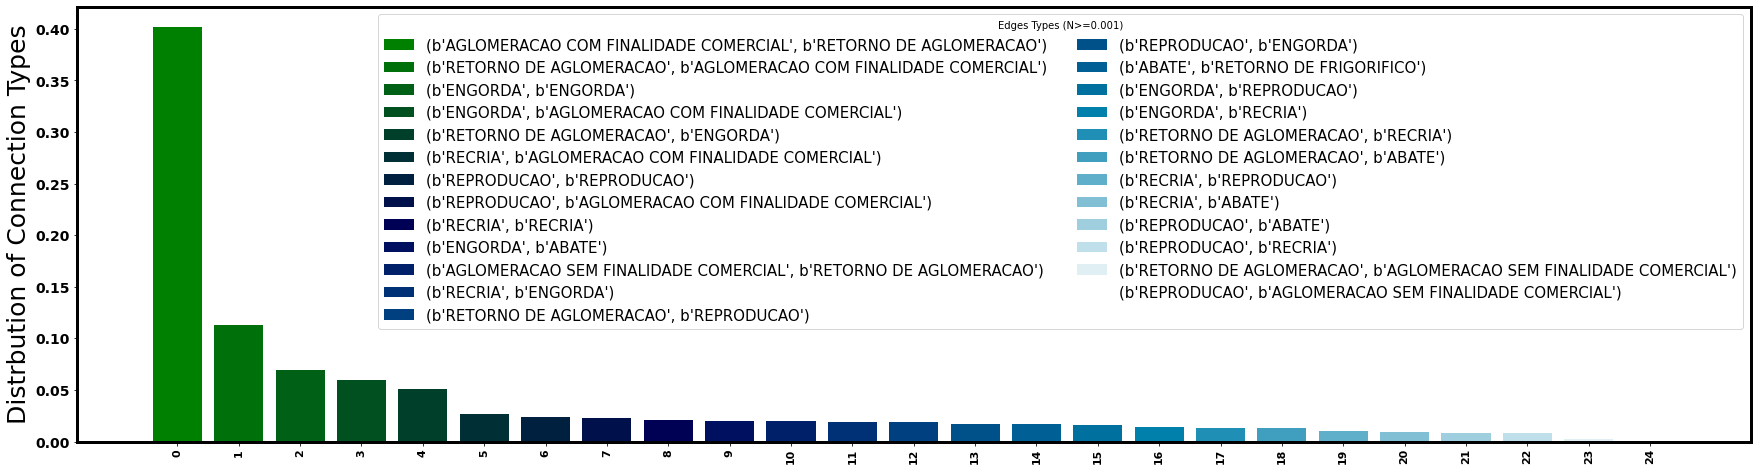

In [135]:
#plot 
from matplotlib import cm
#first sort the list from maximum number of connection types to minimum
dist_mov_reason_conn1.sort(key=lambda x:x[1],reverse=True)
dist_mov_reason_conn1=[x for x in dist_mov_reason_conn1 if x[1]>=0.001]

color=["#023FA5","#7D87B9","#BEC1D4","#D6BCC0","#BB7784","#1D4048",\
                     "#4A6FE3","#8595E1","#B5BBE3","#E6AFB9","#E07B91","#D33F6A",\
                     "#11C638","#8DD593","#C6DEC7","#EAD3C6","#F0B98D","#EF9708",\
                     "#0FCFC0","#9CDED6","#D5EAE7","#F3E1EB","#F6C4E1","#F79CD4","#F45B77"]

colors=plt.cm.get_cmap('ocean', 25)

fig, ax = plt.subplots(1,1,figsize=(30,8))

for i in range(len(dist_mov_reason_conn1)):
    ax.bar(i,dist_mov_reason_conn1[i][1],label=dist_mov_reason_conn1[i][0],color=colors(i))

    
    #creat new legend
#x_legend = '\n'.join(f'{n} - {name}' for n,name in zip(np.arange(len(dist_mov_reason_conn)),[x[0] for x in dist_mov_reason_conn]))
#t = ax.text(.7,.2,x_legend,transform=ax.figure.transFigure)
#fig.subplots_adjust(right=.65)
fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize=11)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3)
# Create names on the x axis
plt.xticks(np.arange(len(dist_mov_reason_conn1)),np.arange(len(dist_mov_reason_conn1)),rotation=90)

plt.ylabel('Distrbution of Connection Types',fontsize=25)
plt.legend(title="Edges Types (N>=0.001)",ncol=2,fontsize=15)
plt.savefig('distribution_edge_types_morethan0.001.pdf')

In [136]:
dist_mov_reason_conn

[((b'AGLOMERACAO COM FINALIDADE COMERCIAL', b'RETORNO DE AGLOMERACAO'),
  0.40149349504586296),
 ((b'RETORNO DE AGLOMERACAO', b'AGLOMERACAO COM FINALIDADE COMERCIAL'),
  0.11287302347969731),
 ((b'ENGORDA', b'ENGORDA'), 0.06974065669939156),
 ((b'ENGORDA', b'AGLOMERACAO COM FINALIDADE COMERCIAL'), 0.059243554549424135),
 ((b'RETORNO DE AGLOMERACAO', b'ENGORDA'), 0.05070873973408382),
 ((b'RECRIA', b'AGLOMERACAO COM FINALIDADE COMERCIAL'), 0.026870424832370222),
 ((b'REPRODUCAO', b'REPRODUCAO'), 0.023489274638287518),
 ((b'REPRODUCAO', b'AGLOMERACAO COM FINALIDADE COMERCIAL'),
  0.0230983779205075),
 ((b'RECRIA', b'RECRIA'), 0.021198520551696444),
 ((b'ENGORDA', b'ABATE'), 0.0202468182887166),
 ((b'AGLOMERACAO SEM FINALIDADE COMERCIAL', b'RETORNO DE AGLOMERACAO'),
  0.02023511267012609),
 ((b'RECRIA', b'ENGORDA'), 0.019242618099936895),
 ((b'RETORNO DE AGLOMERACAO', b'REPRODUCAO'), 0.019119886462593987),
 ((b'REPRODUCAO', b'ENGORDA'), 0.01667873291290062),
 ((b'ABATE', b'RETORNO DE FRIG

In [6]:
trns_rsn_top_all_P=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',\
                    b'RETORNO DE AGLOMERACAO',b'ABATE',b'ENGORDA',b'REPRODUCAO',b'RECRIA',b'CRIA']


#we shoud remove the other movment reason and just keep the one we need
data=df.iloc[:,[3,13,14,15,17,18,19,21,22,30,32]]
    #remove importation exportation        
data=data.set_index('UF_de_Origem') 
data=data.loc[b'MG']
data=data.reset_index()
data=data.set_index('UF_de_Destino') 
data=data.loc[b'MG']
data=data.reset_index()
    

data=data.set_index('ano') 
data=data.loc[2013]
data=data.reset_index()
    
data=data.loc[data['MONTH']<7] 
data=data.reset_index()
edges_list_label=pd.DataFrame(data.groupby(\
     ['Codigo_Municipio_de_Origem','Codigo_Municipio_de_Destino','Codigo_do_Local_de_Origem'\
      ,'Codigo_do_Local_de_Destino','Finalidade']).agg(weight=('animais','sum')).reset_index())

In [288]:
#use py3plex library
#install   pip install py3plex

from py3plex.core import multinet
G_multilayer = multinet.multi_layer_network(network_type="multiplex",directed=True)


#Intra layer edges:

#Layer Livestock Market layer L

    #intra-layer connection
market=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',b'RETORNO DE AGLOMERACAO']
edge_list_livestock= edges_list_label.loc[edges_list_label['Finalidade'].isin(market)].reset_index()
livestock_nodes=[]
for i in range(len(edge_list_livestock)):
    livestock_nodes.append(edge_list_livestock['Codigo_do_Local_de_Origem'][i])
    livestock_nodes.append(edge_list_livestock['Codigo_do_Local_de_Destino'][i])

    edge_single={"source":edge_list_livestock['Codigo_do_Local_de_Origem'][i],\
                "target":edge_list_livestock['Codigo_do_Local_de_Destino'][i],\
                "source_type":"L",\
                "weight" : edge_list_livestock['weight'][i],\
                "target_type":"L"}
    
    G_multilayer.add_edges(edge_single) 

#Layer Fattening
    #intra_layer connections
edge_list_fattening= edges_list_label.loc[edges_list_label['Finalidade']==b'ENGORDA'].reset_index()
fattening_nodes=[]
for i in range(len(edge_list_fattening)):
    fattening_nodes.append(edge_list_fattening['Codigo_do_Local_de_Origem'][i])
    fattening_nodes.append(edge_list_fattening['Codigo_do_Local_de_Destino'][i])
    edge_single={"source":edge_list_fattening['Codigo_do_Local_de_Origem'][i],\
                "target":edge_list_fattening['Codigo_do_Local_de_Destino'][i],\
                "source_type":"F",\
                "weight" : edge_list_fattening['weight'][i],\
                "target_type":"F"}
    G_multilayer.add_edges(edge_single)

#Layer Breeding
    #intra-layer connections
edge_list_breeding= edges_list_label.loc[edges_list_label['Finalidade']==b'REPRODUCAO'].reset_index()
breeding_nodes=[]
for i in range(len(edge_list_breeding)):
    breeding_nodes.append(edge_list_breeding['Codigo_do_Local_de_Origem'][i])
    breeding_nodes.append(edge_list_breeding['Codigo_do_Local_de_Destino'][i])
    edge_single={"source":edge_list_breeding['Codigo_do_Local_de_Origem'][i],\
                "target":edge_list_breeding['Codigo_do_Local_de_Destino'][i],\
                "source_type":"B",\
                "weight" : edge_list_breeding['weight'][i],\
                "target_type":"B"}
    
    G_multilayer.add_edges(edge_single)


#Layer Reasring
    #intra-layer connections
edge_list_rearing= edges_list_label.loc[edges_list_label['Finalidade']==b'RECRIA'].reset_index()
rearing_nodes=[]
for i in range(len(edge_list_rearing)):
    rearing_nodes.append(edge_list_rearing['Codigo_do_Local_de_Origem'][i])
    rearing_nodes.append(edge_list_rearing['Codigo_do_Local_de_Destino'][i])
    edge_single={"source":edge_list_rearing['Codigo_do_Local_de_Origem'][i],\
                "target":edge_list_rearing['Codigo_do_Local_de_Destino'][i],\
                "source_type":"R",\
                "weight" :edge_list_rearing['weight'][i],\
                "target_type":"R"}
    G_multilayer.add_edges(edge_single)

#Layer Slaughterhouse
    #intra-layer connections
edge_list_slaughterhouse= edges_list_label.loc[edges_list_label['Finalidade']==b'ABATE'].reset_index()
slaughterhouse_nodes=[]
for i in range(len(edge_list_slaughterhouse)):
    slaughterhouse_nodes.append(edge_list_slaughterhouse['Codigo_do_Local_de_Origem'][i])
    slaughterhouse_nodes.append(edge_list_slaughterhouse['Codigo_do_Local_de_Destino'][i])
    edge_single={"source":edge_list_slaughterhouse['Codigo_do_Local_de_Origem'][i],\
                "target":edge_list_slaughterhouse['Codigo_do_Local_de_Destino'][i],\
                "source_type":"S",\
                "weight" :edge_list_slaughterhouse['weight'][i],\
                "target_type":"S"}
    G_multilayer.add_edges(edge_single)


#Layer (other edges type of network)
#I ignore the other layer. Because the probability of edges between layer labeled as other with the 4 previouse layers
#is very low.
'''trns_rsn_top_all_P=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',\
                    b'RETORNO DE AGLOMERACAO',b'ABATE',b'ENGORDA',b'REPRODUCAO',b'RECRIA',b'CRIA']
edge_list_other=edges_list_label[~ edges_list_label['Finalidade'].isin(trns_rsn_top_all_P)]
other_nodes=[]
for i in range(len(edge_list_other)):
    other_nodes.append(edge_list_other['Codigo_do_Local_de_Origem'][i])
    other_nodes.append(edge_list_other['Codigo_do_Local_de_Destino'][i])
    edge_single={"source":edge_list_other['Codigo_do_Local_de_Origem'][i],\
                "target":edge_list_other['Codigo_do_Local_de_Destino'][i],\
                "source_type":"O",\
                "weight" :edge_list_other['weight'][i],\
                "target_type":"O"}
    G_multilayer.add_edges(edge_single)'''




#make list of nodes unique
    
livestock_nodes=set(livestock_nodes)
fattening_nodes=set(fattening_nodes)
breeding_nodes=set(breeding_nodes)
rearing_nodes=set(rearing_nodes)
slaughterhouse_nodes=set(slaughterhouse_nodes)
#other_nodes=set(other_nodes)


#edges between layers (inter_layer connections)
#Livestock
    #livestock_fattening
same_nodes=livestock_nodes.intersection(fattening_nodes)
for node in same_nodes:
    edges_double=[{"source":node,"target":node,"source_type":"L","weight" :0.050,\
                "target_type":"F"},{"source":node,"target":node,"source_type":"F","weight" :0.059,\
                "target_type":"L"}]
    G_multilayer.add_edges(edges_double)    
    #livestock_breeding
same_nodes=livestock_nodes.intersection(breeding_nodes)
for node in same_nodes:
    edges_double=[{"source":node,"target":node,"source_type":"L","weight" :0.019,\
                "target_type":"B"},{"source":node,"target":node,"source_type":"B","weight" :0.024,\
                "target_type":"L"}]
    G_multilayer.add_edges(edges_double)
    #livestock_rearing
same_nodes=livestock_nodes.intersection(rearing_nodes)
for node in same_nodes:
    edges_double=[{"source":node,"target":node,"source_type":"L","weight" :0.013,\
                "target_type":"R"},{"source":node,"target":node,"source_type":"R","weight" :0.027,\
                "target_type":"L"}]
    G_multilayer.add_edges(edges_double)
    #livestock_slaughterhouse
same_nodes=livestock_nodes.intersection(slaughterhouse_nodes)
for node in same_nodes:
    edges_double=[{"source":node,"target":node,"source_type":"L","weight" :0.012,\
                "target_type":"S"},{"source":node,"target":node,"source_type":"S","weight" :0.016,\
                "target_type":"L"}]
    G_multilayer.add_edges(edges_double)
    

#Fattening Layer
    #fattening_breeding
same_nodes=fattening_nodes.intersection(breeding_nodes)
for node in same_nodes:
    edges_double=[{"source":node,"target":node,"source_type":"F","weight" :0.016,\
                "target_type":"B"},{"source":node,"target":node,"source_type":"B","weight" :0.016,\
                "target_type":"F"}]
    G_multilayer.add_edges(edges_double)
    #fattening_rearing
same_nodes=fattening_nodes.intersection(rearing_nodes)
for node in same_nodes:
    edges_double=[{"source":node,"target":node,"source_type":"F","weight" :0.014,\
                "target_type":"R"},{"source":node,"target":node,"source_type":"R","weight" :0.019,\
                "target_type":"F"}]
    G_multilayer.add_edges(edges_double)
    #fattening_slaughterhouse
same_nodes=fattening_nodes.intersection(slaughterhouse_nodes)
for node in same_nodes:
    edges_double=[{"source":node,"target":node,"source_type":"F","weight" :0.02,"target_type":"S"}]
    G_multilayer.add_edges(edges_double)
   
                  
                  
                  
#Breeding Layer
#it already added through the previouse adding process

#Rearing Layer
#it already added through the previouse adding process
                  
#Slaughterhouse Layer
#it already added through the previouse adding process
    



In [311]:
test=(G_multilayer.get_edges(data=True))
test1=list(G_multilayer.get_edges(multiplex_edges=True))
test

ValueError: dictionary update sequence element #0 has length 4; 2 is required

In [310]:
test[(b'21166','L')][(b'31001040176','L')]

TypeError: list indices must be integers or slices, not tuple

In [304]:
list(G_multilayer.get_nodes())

[(b'21166', 'L'),
 (b'31001040176', 'L'),
 (b'31001040315', 'L'),
 (b'31001040349', 'L'),
 (b'31001040439', 'L'),
 (b'31001040778', 'L'),
 (b'31001040790', 'L'),
 (b'31001040915', 'L'),
 (b'21311', 'L'),
 (b'31001040327', 'L'),
 (b'31001040386', 'L'),
 (b'21476', 'L'),
 (b'21632', 'L'),
 (b'21819', 'L'),
 (b'31001040654', 'L'),
 (b'31001040752', 'L'),
 (b'22197', 'L'),
 (b'22488', 'L'),
 (b'31001040085', 'L'),
 (b'22923', 'L'),
 (b'31001040193', 'L'),
 (b'31001040458', 'L'),
 (b'31001040632', 'L'),
 (b'31001040825', 'L'),
 (b'31001040871', 'L'),
 (b'31001040877', 'L'),
 (b'23188', 'L'),
 (b'31001040088', 'L'),
 (b'31001040580', 'L'),
 (b'31001040693', 'L'),
 (b'31001040721', 'L'),
 (b'23412', 'L'),
 (b'23710', 'L'),
 (b'31001040045', 'L'),
 (b'31001040052', 'L'),
 (b'31001040097', 'L'),
 (b'31001040101', 'L'),
 (b'31001040109', 'L'),
 (b'31001040124', 'L'),
 (b'31001040127', 'L'),
 (b'31001040141', 'L'),
 (b'31001040156', 'L'),
 (b'31001040167', 'L'),
 (b'31001040256', 'L'),
 (b'310010

In [271]:
B = multinet.multi_layer_network(network_type="multilayer")
B.add_edges([[1,1,2,1,1],[1,2,3,2,1],[1,2,3,1,1],[2,1,3,2,1]],input_type="list")

In [293]:
list(B.get_nodes())


[(1, 1), (2, 1), (1, 2), (3, 2), (3, 1)]

In [272]:
C = B.subnetwork([2],subset_by="layers")
print(list(C.get_nodes()))

[(1, 2), (3, 2)]


In [273]:
C = B.subnetwork([1],subset_by="node_names")
print(list(C.get_nodes()))

[(1, 2), (1, 1)]


In [274]:
C = B.subnetwork([(1,1),(1,2)],subset_by="node_layer_names")
print(list(C.get_nodes()))


[(1, 2), (1, 1)]


In [275]:
list(B.get_edges(data=True))

[((1, 1), (2, 1), {'weight': 1, 'type': 'default'}),
 ((2, 1), (3, 2), {'weight': 1, 'type': 'default'}),
 ((1, 2), (3, 2), {'weight': 1, 'type': 'default'}),
 ((1, 2), (3, 1), {'weight': 1, 'type': 'default'})]

In [70]:
%run Function_flow_map.ipynb
%run Function_network.ipynb
%run Function_epidemic.ipynb

SyntaxError: positional argument follows keyword argument (<ipython-input-70-305f6c1d227d>, line 31)

SyntaxError: positional argument follows keyword argument (<ipython-input-70-305f6c1d227d>, line 31)

# Jan 2023 - Epidemic and risk map of the diff movement network (city_network)

In [11]:
import copy
import sys
import random 
import numpy as np
import statistics
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
import pandas as pd
import feather as ft

In [135]:

%run Function_network.ipynb
%run Function_epidemic.ipynb
%run Function_visualisation.ipynb

In [ ]:
# first run epidemic on network of dif movement
#run epidemic in network of diff movement with 30 weight increae
#run epidemic in network of diff molvement with 30 increae in links as missiong link from frequent edges in dataset




In [14]:

#list of six top transmission reasons
trns_rsn_top=['Livestock_Market',b'ABATE',b'ENGORDA',b'REPRODUCAO',b'RECRIA',b'CRIA'] 
type_english_name=['Livestock_Market', 'Slaughterhouse','Fattening','Breeding','Rearing-step 2','Rearing-step 1']
type_english_name_dic={'Livestock_Market':'Livestock_Market', 
    b'ABATE':'Slaughterhouse',b'ENGORDA':'Fattening',b'REPRODUCAO':'Breeding',b'RECRIA':'Rearing-step 2',\
                    b'CRIA':'Rearing-step 1'}
region_list=['North','East','Center','West','South']
trns_rsn_top_all_P=[b'AGLOMERACAO COM FINALIDADE COMERCIAL',b'AGLOMERACAO SEM FINALIDADE COMERCIAL',b'RETORNO DE AGLOMERACAO',b'ABATE',b'ENGORDA',b'REPRODUCAO',b'RECRIA',b'CRIA']
#dataset include just top transmissions reasons
#dataset=dataset.loc[dataset['Finalidade'].isin(trns_rsn_top_all_P)]

In [64]:
#make one month city network of different movement type
#load the complete dataset
dataframe=pd.read_csv('Clean_dataset/clean_data_comprehensive_final.csv')
dict_year_month_day_number={'2013':{1:(0,30),2:(31,58),3:(59,89),4:(90,119),5:(120,150),6:(151,180),7:(181,211),\
        8:(212,242),9:(243,272),10:(272,303),11:(304,333),12:(334,364)},'2014':{1:(365,395),2:(396,423),3:(424,454),\
                4:(455,484),5:(485,515),6:(516,545),7:(546,576),8:(577,607),9:(608,637),10:(638,668),11:(669,698),\
                12:(699,729)},'2015':{1:(730,760),2:(761,788),3:(789,819),4:(820,849),5:(850,880),6:(881,910),\
                7:(911,941),8:(941,972),9:(973,1002),10:(1003,1033),11:(1034,1063),12:(1064,1094)},'2016':{1:(1095,1125)\
                ,2:(1126,1154),3:(1155,1185),4:(1186,1215),5:(1216,1246),6:(1247,1276),7:(1277,1307),8:(1308,1338)\
                ,9:(1339,1368),10:(1369,1399),11:(1400,1429),12:(1430,1459)}}
#remove the trades happn within one city (local)
data_nl=dataframe[dataframe['local_non_local']=='non_local']
data_nl= data_nl.reset_index(drop=True)

#cut one month dataset. June
month_day=dict_year_month_day_number['2013'][6]
data_j=cut_dataset_between_twoday(data_nl, month_day[0], month_day[1])
#to have a list of nodes to choose initial infected nodes from. we need a list that includes the nodes that existed in 
#network of all type of movement reason we are investigating
#list_nodes_similar=[]
#generate city_network
#original network:
edges_list_o= pd.DataFrame(data_j.groupby(['city_n_origin','city_n_destination'])\
                             .size().reset_index(name="weight"))
G_o= nx.from_pandas_edgelist(edges_list_o,'city_n_origin','city_n_destination', edge_attr='weight',create_using=nx.DiGraph())
IN_IN_o= []
for i in range(10):
    IN_IN_o.append((random.sample(list(G_o.nodes()),int(len(list(G_o.nodes()))*0.01)))) #int(len(node_all_m0)*0.01)

    
epi_prmthr(0.001, 500) 
df_original = multiran_result_SI_multiple_IN_IN(G_o, IN_IN_o)
for mr in trns_rsn_top[:4]:
    e_name=type_english_name_dic[mr]
    mr=str(mr)
    locals()['G_{}'.format(e_name)]= make_movement_reason_network_cities(data_j, mr, 'movement')
    #make 10 list of initial infected nodes:
    IN_IN_multiple= []
    for i in range(10):
        IN_IN_multiple.append((random.sample(list(locals()['G_{}'.format(e_name)].nodes()),\
                                int(len(list(locals()['G_{}'.format(e_name)].nodes()))*0.01)))) #int(len(node_all_m0)*0.01)

    
    #add to the missing links random 30%:
    #locals()['G_{}_ra_ML30'.format(mr)]= add_just_missing_link_entire(Graph,locals()['G_{}'.format(mr)])
    
    
    #run epidemy
    locals()['df_{}'.format(e_name)]= multiran_result_SI_multiple_IN_IN(locals()['G_{}'.format(e_name)], IN_IN_multiple)
    # locals()['mean_{}'.format(mr)],locals()['min_{}'.format(mr)]\,locals()['max_{}'.format(mr)]

 
    
#calculate mean max min


In [68]:
    
epi_prmthr(0.001, 500)
edges_list_o= pd.DataFrame(data_j.groupby(['city_n_origin','city_n_destination'])\
                             .size().reset_index(name="weight"))
G_o= nx.from_pandas_edgelist(edges_list_o,'city_n_origin','city_n_destination', edge_attr='weight',create_using=nx.DiGraph())
IN_IN_o= []
for i in range(10):
    IN_IN_o.append((random.sample(list(G_o.nodes()),int(len(list(G_o.nodes()))*0.01)))) #int(len(node_all_m0)*0.01)
df_original = multiran_result_SI_multiple_IN_IN(G_o, IN_IN_o)

In [107]:
test=[]
for (u,v) in G_Slaughterhouse.edges():
    test.append(v)
    
len(set(test))

110

In [125]:
daste= data_j.loc[data_j['Finalidade'].isin(['Livestock_Market'])] 
daste

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,UF_de_Destino,UF_de_Origem,Serie_e_Numero_da_GTA,Data_de_emissao,Especie,Finalidade,...,city_n_origin,city_n_destination,local_non_local,origin_region,destination_region,oigin_mesoregion_name,destination_mesoregion_name,destination_mesoregion_name_1,oigin_microregion_name,destination_microregion_name


In [81]:
df_Slaughterhouse

,vals_0,vals_1,vals_2,vals_3,vals_4,vals_5,vals_6,vals_7,vals_8,vals_9,time
0,0.009777,0.009777,0.009777,0.009777,0.009777,0.009777,0.009777,0.009777,0.009777,0.009777,0
1,0.011173,0.011173,0.009777,0.009777,0.009777,0.009777,0.009777,0.009777,0.009777,0.009777,1
2,0.011173,0.011173,0.009777,0.009777,0.009777,0.009777,0.009777,0.009777,0.009777,0.009777,2
3,0.011173,0.011173,0.009777,0.009777,0.009777,0.009777,0.009777,0.011173,0.009777,0.009777,3
4,0.011173,0.011173,0.009777,0.009777,0.009777,0.009777,0.012570,0.012570,0.009777,0.009777,4
...,...,...,...,...,...,...,...,...,...,...,...
496,0.048883,0.046089,0.041899,0.061453,0.040503,0.032123,0.046089,0.055866,0.032123,0.023743,496
497,0.048883,0.046089,0.041899,0.061453,0.040503,0.032123,0.046089,0.055866,0.032123,0.023743,497
498,0.048883,0.046089,0.041899,0.061453,0.040503,0.032123,0.046089,0.055866,0.032123,0.025140,498
499,0.048883,0.046089,0.041899,0.061453,0.040503,0.032123,0.046089,0.055866,0.032123,0.025140,499


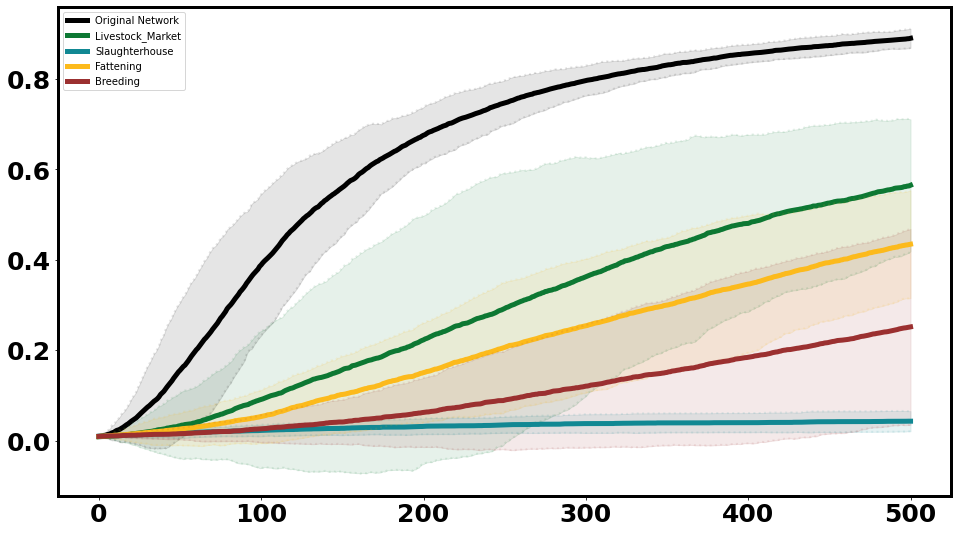

In [82]:
colors = ['#0D7833', '#118893', '#FCBA1C', '#9B3030', '#F56113']

fig, ax = plt.subplots(1,1,figsize=(16,9))
#plot original
df_mean= mean_max_min(df_original) 
plt.plot(df_original['time'], list(df_mean[0]),c='black',label='Original Network',linewidth=5.0)
plt.fill_between(df_original['time'], list(df_mean[2]), list(df_mean[1]), color='black', alpha=.1)
plt.plot(df_original['time'], list(df_mean[2]), c= 'black',linewidth=2.0,linestyle='dotted',alpha=.1)
plt.plot(df_original['time'], list(df_mean[1]), c= 'black' ,linewidth=2.0,linestyle='dotted',alpha=.1)

#plot others
col_count=0
for mr in trns_rsn_top[:4]:
    e_name=type_english_name_dic[mr]
    #calculate mean max min
    me_ma_mi= mean_max_min(locals()['df_{}'.format(e_name)])
    plt.plot(df_original['time'], list(me_ma_mi[0]),c=colors[col_count],label=e_name,linewidth=5.0)
    plt.fill_between(df_original['time'], list(me_ma_mi[2]), list(me_ma_mi[1]), color=colors[col_count], alpha=.1)
    plt.plot(df_original['time'], list(me_ma_mi[2]), c= colors[col_count],linewidth=2.0,linestyle='dotted',alpha=.1)
    plt.plot(df_original['time'], list(me_ma_mi[1]), c= colors[col_count] ,linewidth=2.0,linestyle='dotted',alpha=.1)
    col_count+=1
    
fontsize = 25

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    
plt.rc('axes', linewidth=3) 
plt.legend()
#plt.xlabel('')
#plt.xlim(0,200)
#plt.xlabel('Time(steps)',fontsize=38)
#plt.legend(prop={'weight':'bold','size' : 25},fontsize=20)
#plt.savefig('Synthetic_Network/MN_Reny_com_SI_0.001_10_30_modify.pdf')



In [142]:
#remove the weights and fix all the weights equal 1 to see how the epidemic behave
epi_prmthr(0.1, 25)
for mr in trns_rsn_top[:4]:
    e_name=type_english_name_dic[mr]
    mr=str(mr)
    locals()['G_w1_{}'.format(e_name)]=nx.DiGraph()
    for (u,v) in locals()['G_{}'.format(e_name)].edges():
        locals()['G_w1_{}'.format(e_name)].add_edge(u,v,weight=1)
    
    IN_IN_multiple= []
    for i in range(30):
        IN_IN_multiple.append((random.sample(list(locals()['G_w1_{}'.format(e_name)].nodes()),\
                                int(len(list(locals()['G_w1_{}'.format(e_name)].nodes()))*0.01)))) #int(len(node_all_m0)*0.01)
    
    
    #run epidemy
    locals()['df_w1_{}'.format(e_name)]= multiran_result_SI_multiple_IN_IN(locals()['G_w1_{}'.format(e_name)], IN_IN_multiple)

    
G_w1_o=nx.DiGraph()
for (u,v) in G_o.edges():
    G_w1_o.add_edge(u,v,weight=1)

IN_IN_o= []
for i in range(30):
    IN_IN_o.append((random.sample(list(G_w1_o.nodes()),int(len(list(G_w1_o.nodes()))*0.01)))) #int(len(node_all_m0)*0.01)
df_original = multiran_result_SI_multiple_IN_IN(G_w1_o, IN_IN_o)    



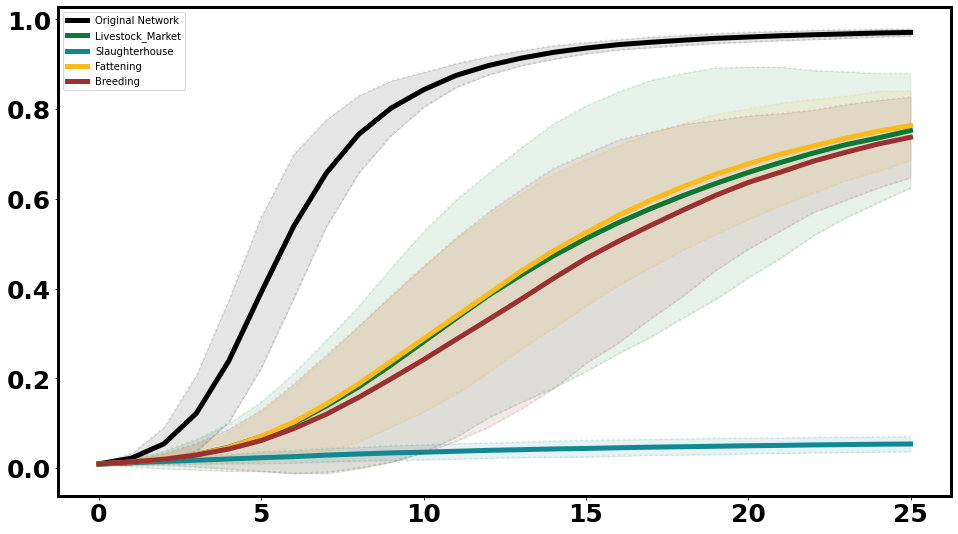

In [143]:
colors = ['#0D7833', '#118893', '#FCBA1C', '#9B3030', '#F56113']

fig, ax = plt.subplots(1,1,figsize=(16,9))
#plot original
df_mean= mean_max_min(df_original) 
plt.plot(df_original['time'], list(df_mean[0]),c='black',label='Original Network',linewidth=5.0)
plt.fill_between(df_original['time'], list(df_mean[2]), list(df_mean[1]), color='black', alpha=.1)
plt.plot(df_original['time'], list(df_mean[2]), c= 'black',linewidth=2.0,linestyle='dotted',alpha=.1)
plt.plot(df_original['time'], list(df_mean[1]), c= 'black' ,linewidth=2.0,linestyle='dotted',alpha=.1)

#plot others
col_count=0
for mr in trns_rsn_top[:4]:
    e_name=type_english_name_dic[mr]
    #calculate mean max min
    me_ma_mi= mean_max_min(locals()['df_w1_{}'.format(e_name)])
    plt.plot(df_w1_Fattening['time'], list(me_ma_mi[0]),c=colors[col_count],label=e_name,linewidth=5.0)
    plt.fill_between(df_w1_Fattening['time'], list(me_ma_mi[2]), list(me_ma_mi[1]), color=colors[col_count], alpha=.1)
    plt.plot(df_w1_Fattening['time'], list(me_ma_mi[2]), c= colors[col_count],linewidth=2.0,linestyle='dotted',alpha=.1)
    plt.plot(df_w1_Fattening['time'], list(me_ma_mi[1]), c= colors[col_count] ,linewidth=2.0,linestyle='dotted',alpha=.1)
    col_count+=1
    
fontsize = 25

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    
plt.rc('axes', linewidth=3) 
plt.legend()
#plt.xlabel('')
#plt.xlim(0,200)
#plt.xlabel('Time(steps)',fontsize=38)
#plt.legend(prop={'weight':'bold','size' : 25},fontsize=20)
#plt.savefig('Synthetic_Network/MN_Reny_com_SI_0.001_10_30_modify.pdf')



# The slaughter houses network has 700 origin and 110 destination. so the epidemic always have the same path because most of the different origins have the same destinations. So from now I will focud on Fattening, Breeding and Livestock_Market networks

In [113]:
epi_prmthr(0.001, 500) 
df_original = multiran_result_SI_multiple_IN_IN(G_o, IN_IN_o)
for mr in trns_rsn_top[:4]:
    e_name=type_english_name_dic[mr]
    mr=str(mr)
    locals()['G_{}'.format(e_name)]= make_movement_reason_network_cities(data_j, mr, 'movement')
    #make 10 list of initial infected nodes:
    IN_IN_multiple= []
    for i in range(50):
        IN_IN_multiple.append((random.sample(list(locals()['G_{}'.format(e_name)].nodes()),\
                                int(len(list(locals()['G_{}'.format(e_name)].nodes()))*0.01)))) #int(len(node_all_m0)*0.01)
    
    
    #run epidemy
    locals()['df_{}'.format(e_name)]= multiran_result_SI_multiple_IN_IN(locals()['G_{}'.format(e_name)], IN_IN_multiple)
    


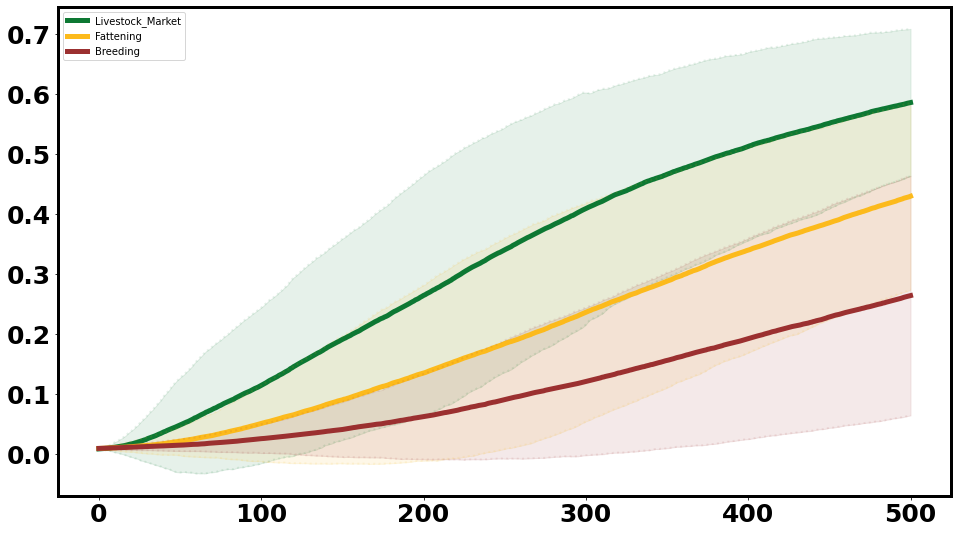

In [115]:
colors = ['#0D7833', '#FCBA1C', '#9B3030', '#F56113']
trns_rsn_3=  ['Livestock_Market',b'ENGORDA',b'REPRODUCAO'] 

fig, ax = plt.subplots(1,1,figsize=(16,9))
#plot others
col_count=0
for mr in trns_rsn_3:
    e_name=type_english_name_dic[mr]
    #calculate mean max min
    me_ma_mi= mean_max_min(locals()['df_{}'.format(e_name)])
    plt.plot(df_Fattening['time'], list(me_ma_mi[0]),c=colors[col_count],label=e_name,linewidth=5.0)
    plt.fill_between(df_Fattening['time'], list(me_ma_mi[2]), list(me_ma_mi[1]), color=colors[col_count], alpha=.1)
    plt.plot(df_Fattening['time'], list(me_ma_mi[2]), c= colors[col_count],linewidth=2.0,linestyle='dotted',alpha=.1)
    plt.plot(df_Fattening['time'], list(me_ma_mi[1]), c= colors[col_count] ,linewidth=2.0,linestyle='dotted',alpha=.1)
    col_count+=1
    
fontsize = 25

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    
plt.rc('axes', linewidth=3) 
plt.legend()
#plt.xlabel('')
#plt.xlim(0,200)
#plt.xlabel('Time(steps)',fontsize=38)
#plt.legend(prop={'weight':'bold','size' : 25},fontsize=20)
#plt.savefig('Synthetic_Network/MN_Reny_com_SI_0.001_10_30_modify.pdf')



# plot cities that have each type of transaction

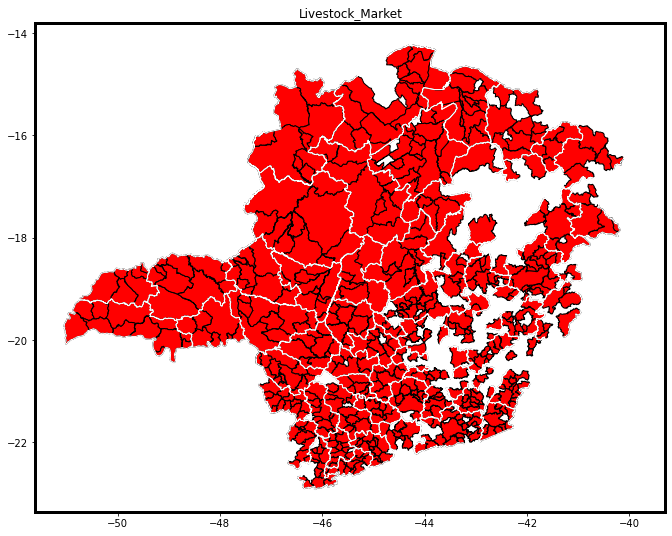

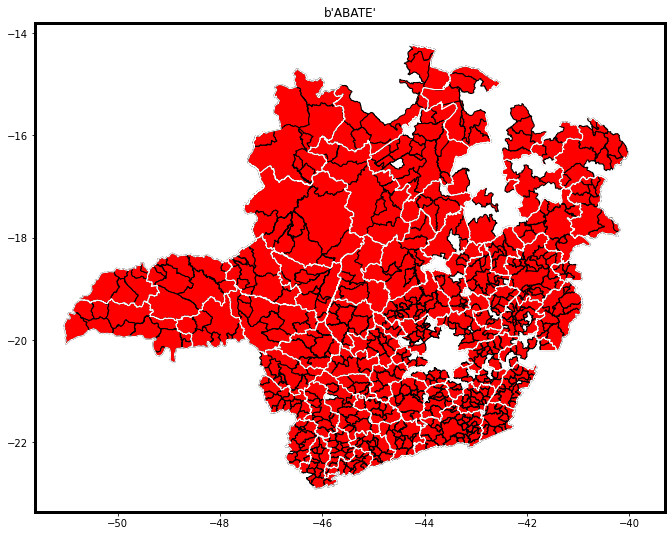

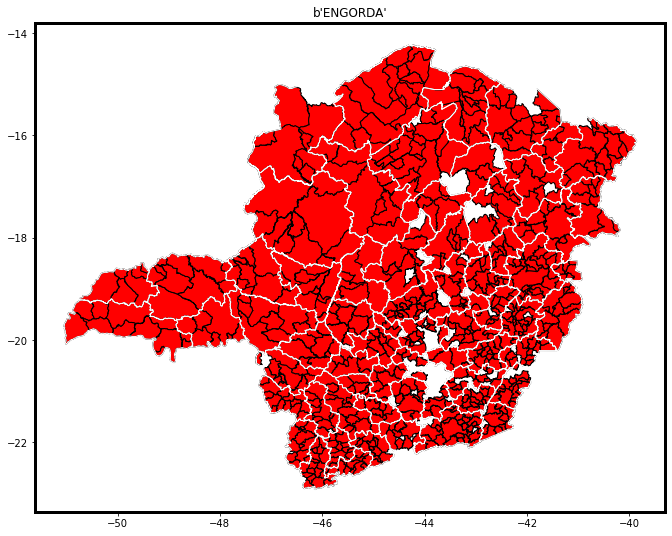

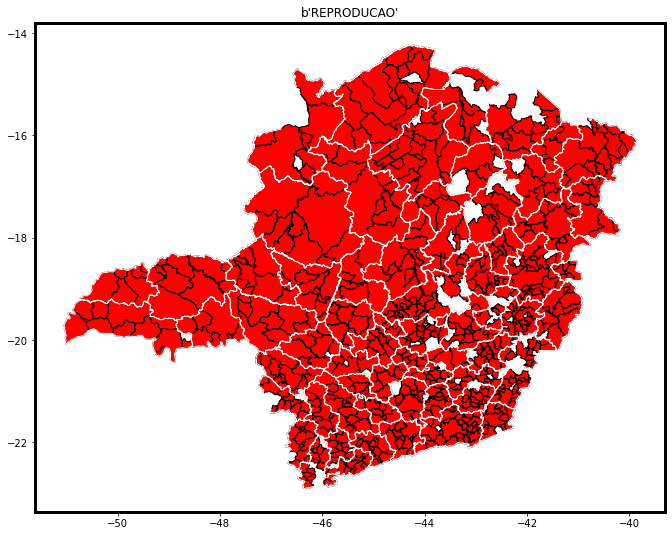

In [94]:
for mr in trns_rsn_top[:4]:
    e_name=type_english_name_dic[mr]
    mr=str(mr)
    list_c= list(locals()['G_{}'.format(e_name)].nodes())
    fig, ax = plt.subplots(1,1,figsize=(16,9))
    ax= plot_cities(ax, list_c)
    ax= plot_micro_map(ax)
    ax.set_title(mr)
    

# if let epidemic just go through one type of the movement - I did it befor with premises network. I can repeat with city_ network.

In [144]:
#make a multiedges network

#first we need to make it dataset just include three movement reason we are interested in
trns_rsn_3=  ['Livestock_Market',b'ENGORDA',b'REPRODUCAO'] 
df_3=pd.DataFrame(columns= list(data_j.columns))
for tr in trns_rsn_3:
    part= cut_dataset_movement_reason(data_j, tr)
    df_3= pd.concat([df_3, part])
        
#list_w_r=edges_list_label.loc[edges_list_label['Finalidade'].isin(trns_rsn_top_all_P)] 

G_multi_m= make_city_network_edge_label_movement_reason_MultiGraph(df_3, 'movement')
G_multi_a= make_city_network_edge_label_movement_reason_MultiGraph(df_3, 'animal')


In [8]:
import geopandas as gpd
import math
import geopy.distance
mg_map=gpd.read_file('mg_gps_map_data/mg_city/31MUE250GC_SIR.shp')
mg_map['city_number'] = mg_map.index
mg_map['center_co']=mg_map['geometry'].centroid
mg_map_cn=list(mg_map['city_number'])
distance=[]
for t in range(len(mg_map)):
    co1=mg_map.loc[t,'center_co']
    coords_1=(co1.x,co1.y)
    for j in range(t , len(mg_map)):
        co2=mg_map.loc[j,'center_co']
        coords_2=(co2.x,co2.y)
        d=geopy.distance.distance(coords_1, coords_2).kilometers
            
        if d!=0:
            distance.append((mg_map.loc[t,'city_number'],mg_map.loc[j,'city_number'],d))